In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import kaggle

kaggle.api.authenticate()

In [2]:
kaggle.api.dataset_download_files('suddharshan/retail-price-optimization', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/suddharshan/retail-price-optimization


# EDA

In [2]:
df = pd.read_csv('retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [3]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [4]:
df['product_category_name'].value_counts()

product_category_name
garden_tools             160
health_beauty            130
watches_gifts            103
computers_accessories     69
bed_bath_table            61
cool_stuff                57
furniture_decor           48
perfumery                 26
consoles_games            22
Name: count, dtype: int64

## Checking for NA's

In [5]:
df.isna().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

## Checking for duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

## Checking Data Types of our Variables

In [10]:
df.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

## Drop unnecessary columns and Visualize Data

* Use histograms to inspect variable distributions
* Visualizing unit_pricing to inspect skewness
* Correlation Heatmap to inspect relationships between variables
* Box plots to determine skew, and overall distributions

In [11]:
df = df.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis=1)

array([[<Axes: title={'center': 'qty'}>,
        <Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'freight_price'}>,
        <Axes: title={'center': 'unit_price'}>,
        <Axes: title={'center': 'product_weight_g'}>],
       [<Axes: title={'center': 'product_score'}>,
        <Axes: title={'center': 'customers'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'weekend'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>, <Axes: title={'center': 's'}>,
        <Axes: title={'center': 'volume'}>,
        <Axes: title={'center': 'comp_1'}>],
       [<Axes: title={'center': 'ps1'}>, <Axes: title={'center': 'fp1'}>,
        <Axes: title={'center': 'comp_2'}>,
        <Axes: title={'center': 'ps2'}>, <Axes: title={'center': 'fp2'}>],
       [<Axes: title={'center': 'comp_3'}>,
        <Axes: title={'center': 'ps3'}>, <Axes: title={'center': 'fp3'}>,
      

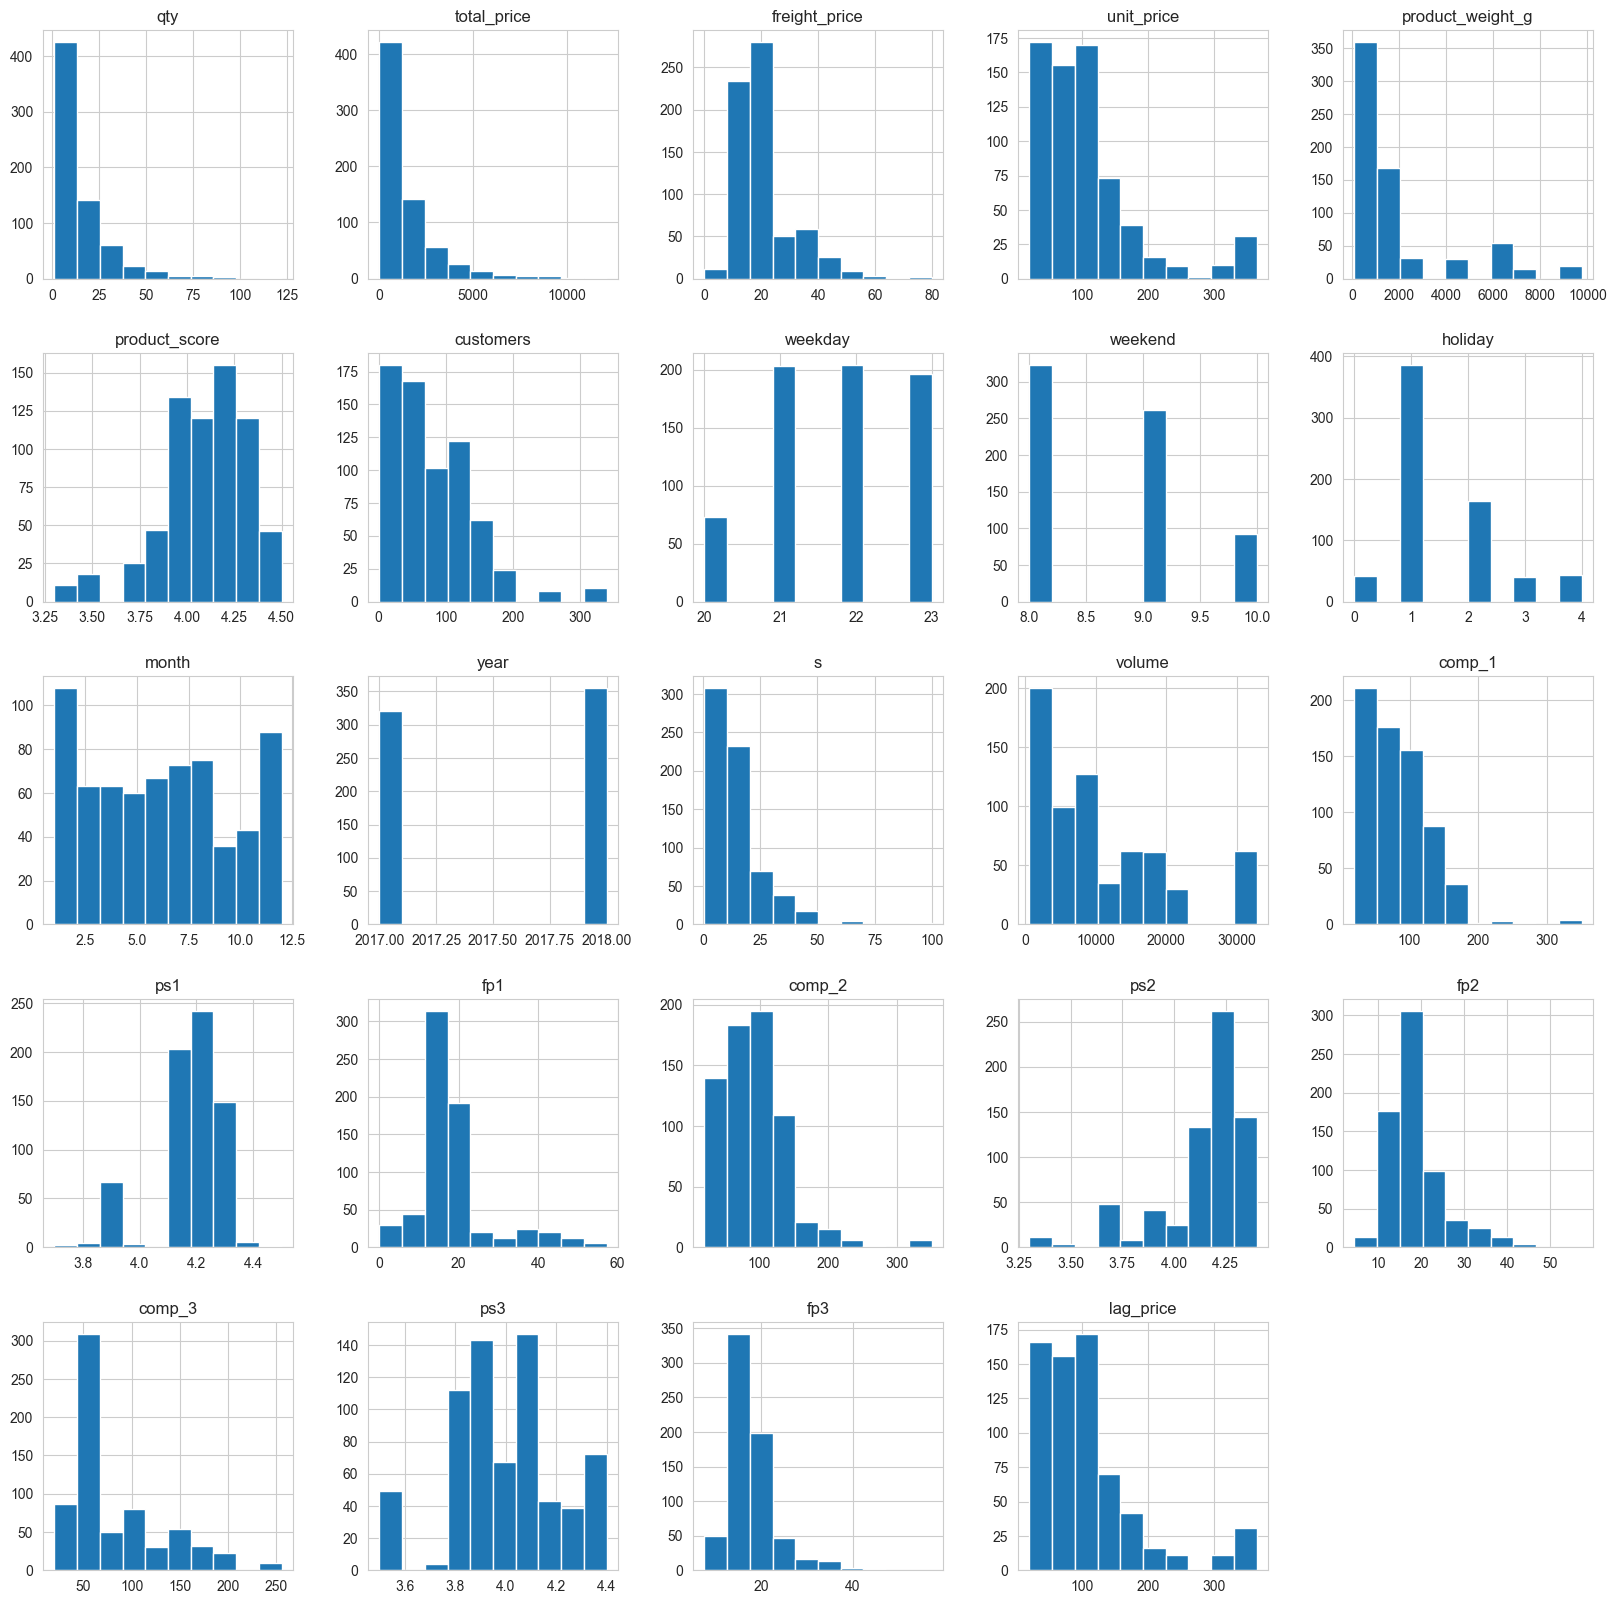

In [12]:
df.hist(figsize=(20,20),bins=10)

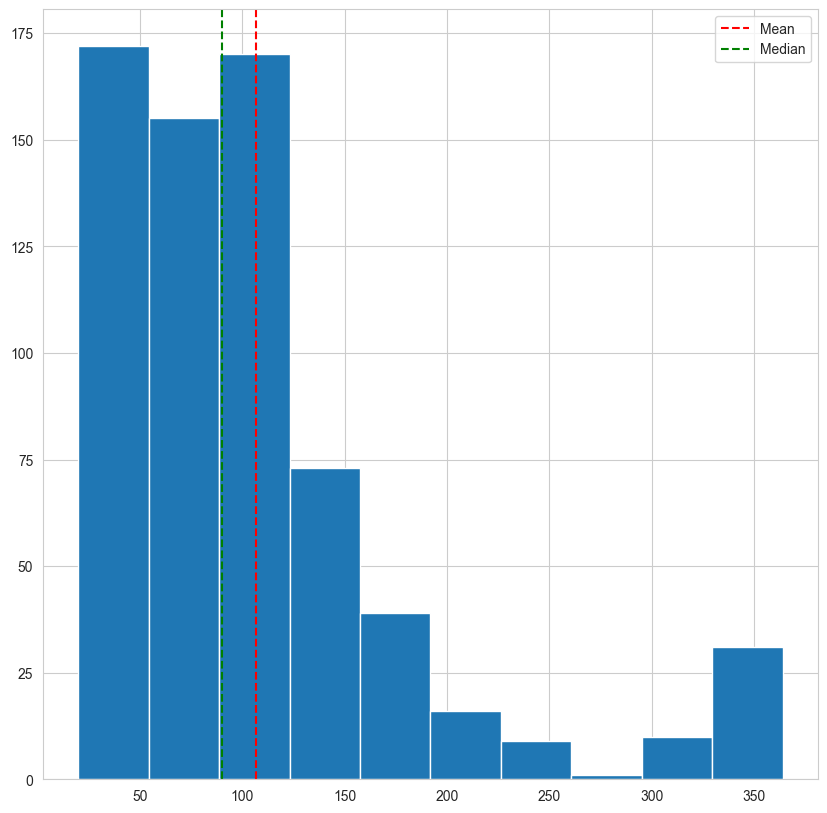

In [13]:
df['unit_price'].hist(figsize=(10,10),bins=10)
plt.axvline(df['unit_price'].mean(), color='r', linestyle='dashed', label='Mean')
plt.axvline(df['unit_price'].median(), color='g', linestyle='dashed', label='Median')
# plt.axvline(df['unit_price'].mode(), color='r', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()

<Axes: >

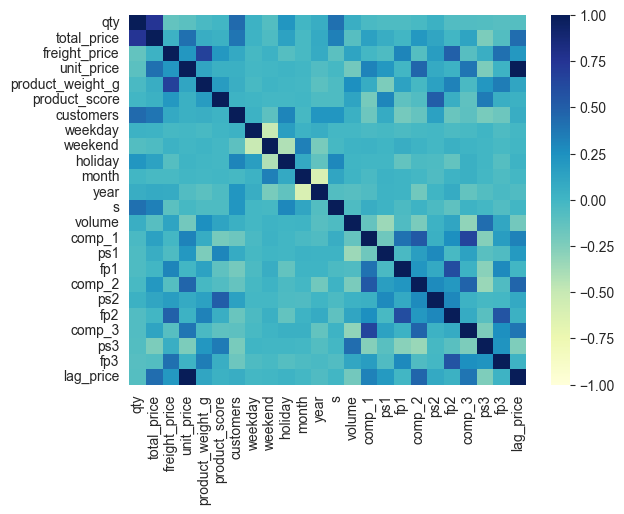

In [14]:
cor_matrix = df.corr(numeric_only=True,method='pearson')
sns.heatmap(cor_matrix, vmin=-1, vmax=1, cmap='YlGnBu')

## Assessing variable correlations against unit_price, we see that there are weak to moderate positive relationships with our competitor's pricing (strongest being comp_2 pricing with an r-score of .46)
* Strongest correlation is with lag price (.99)
* Suggest that previous month unit pricing positively influences current month unit pricing

In [20]:
cor_matrix['unit_price'].to_frame().style.background_gradient(cmap='YlGnBu', vmin=-1, vmax=1)

,unit_price
qty,-0.103432
total_price,0.409001
freight_price,0.203659
unit_price,1.000000
product_weight_g,0.112958
product_score,0.042162
customers,0.043391
weekday,-0.011949
weekend,-0.000042
holiday,0.012573


In [13]:
df['unit_price'].std()

np.float64(76.18297171286699)

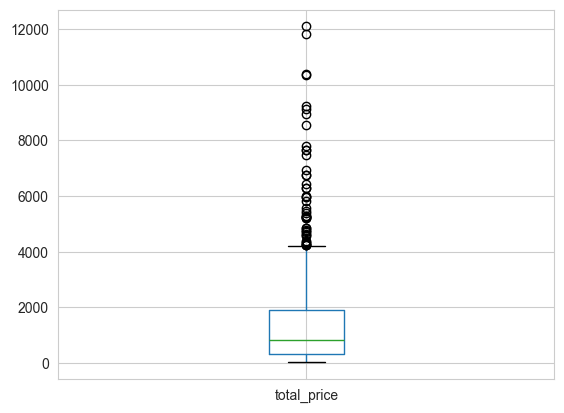

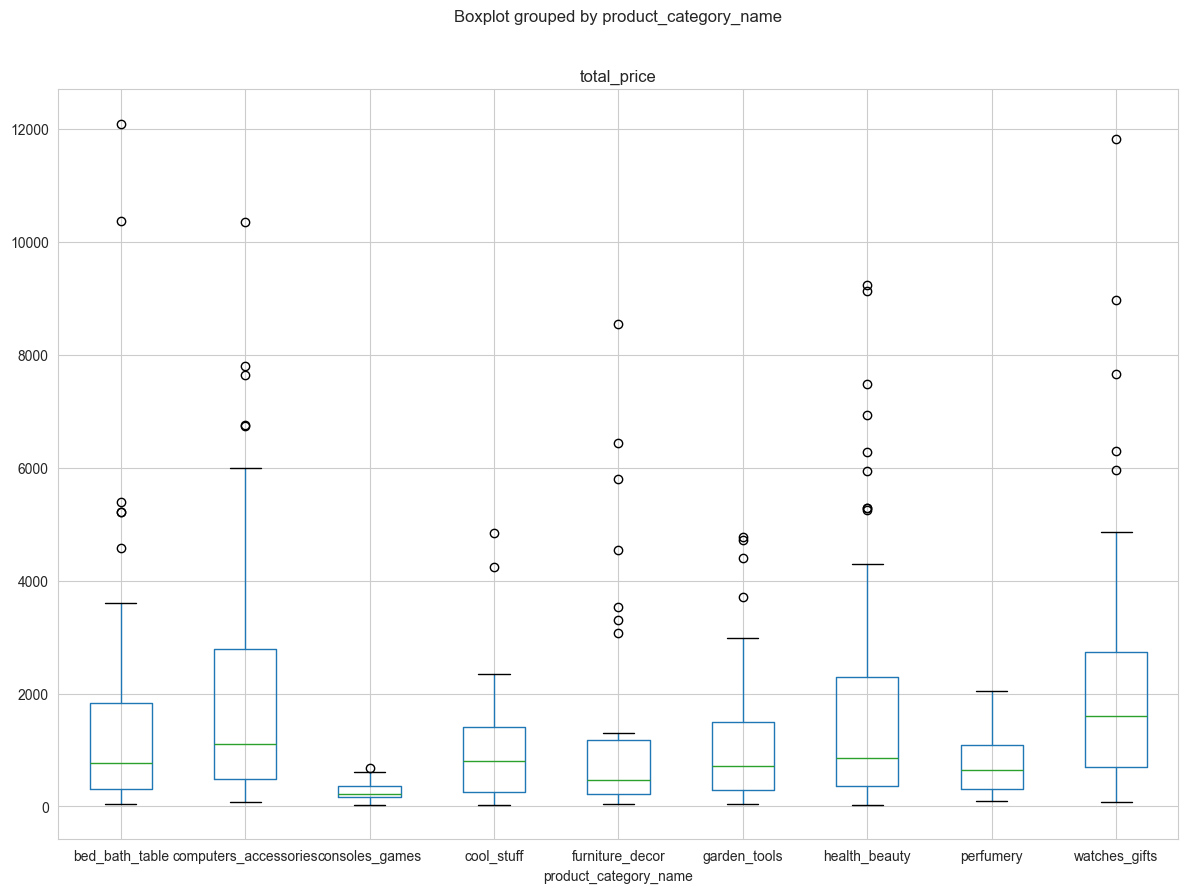

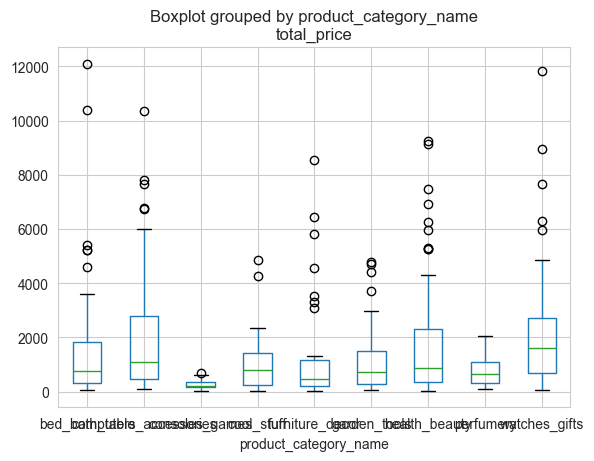

In [14]:
df.boxplot(column='total_price')
df.boxplot(column='total_price', figsize=(14,10),by='product_category_name')
df.boxplot(column='total_price', by='product_category_name')
plt.show()

array([[<Axes: title={'center': 'bed_bath_table'}>,
        <Axes: title={'center': 'computers_accessories'}>,
        <Axes: title={'center': 'consoles_games'}>],
       [<Axes: title={'center': 'cool_stuff'}>,
        <Axes: title={'center': 'furniture_decor'}>,
        <Axes: title={'center': 'garden_tools'}>],
       [<Axes: title={'center': 'health_beauty'}>,
        <Axes: title={'center': 'perfumery'}>,
        <Axes: title={'center': 'watches_gifts'}>]], dtype=object)

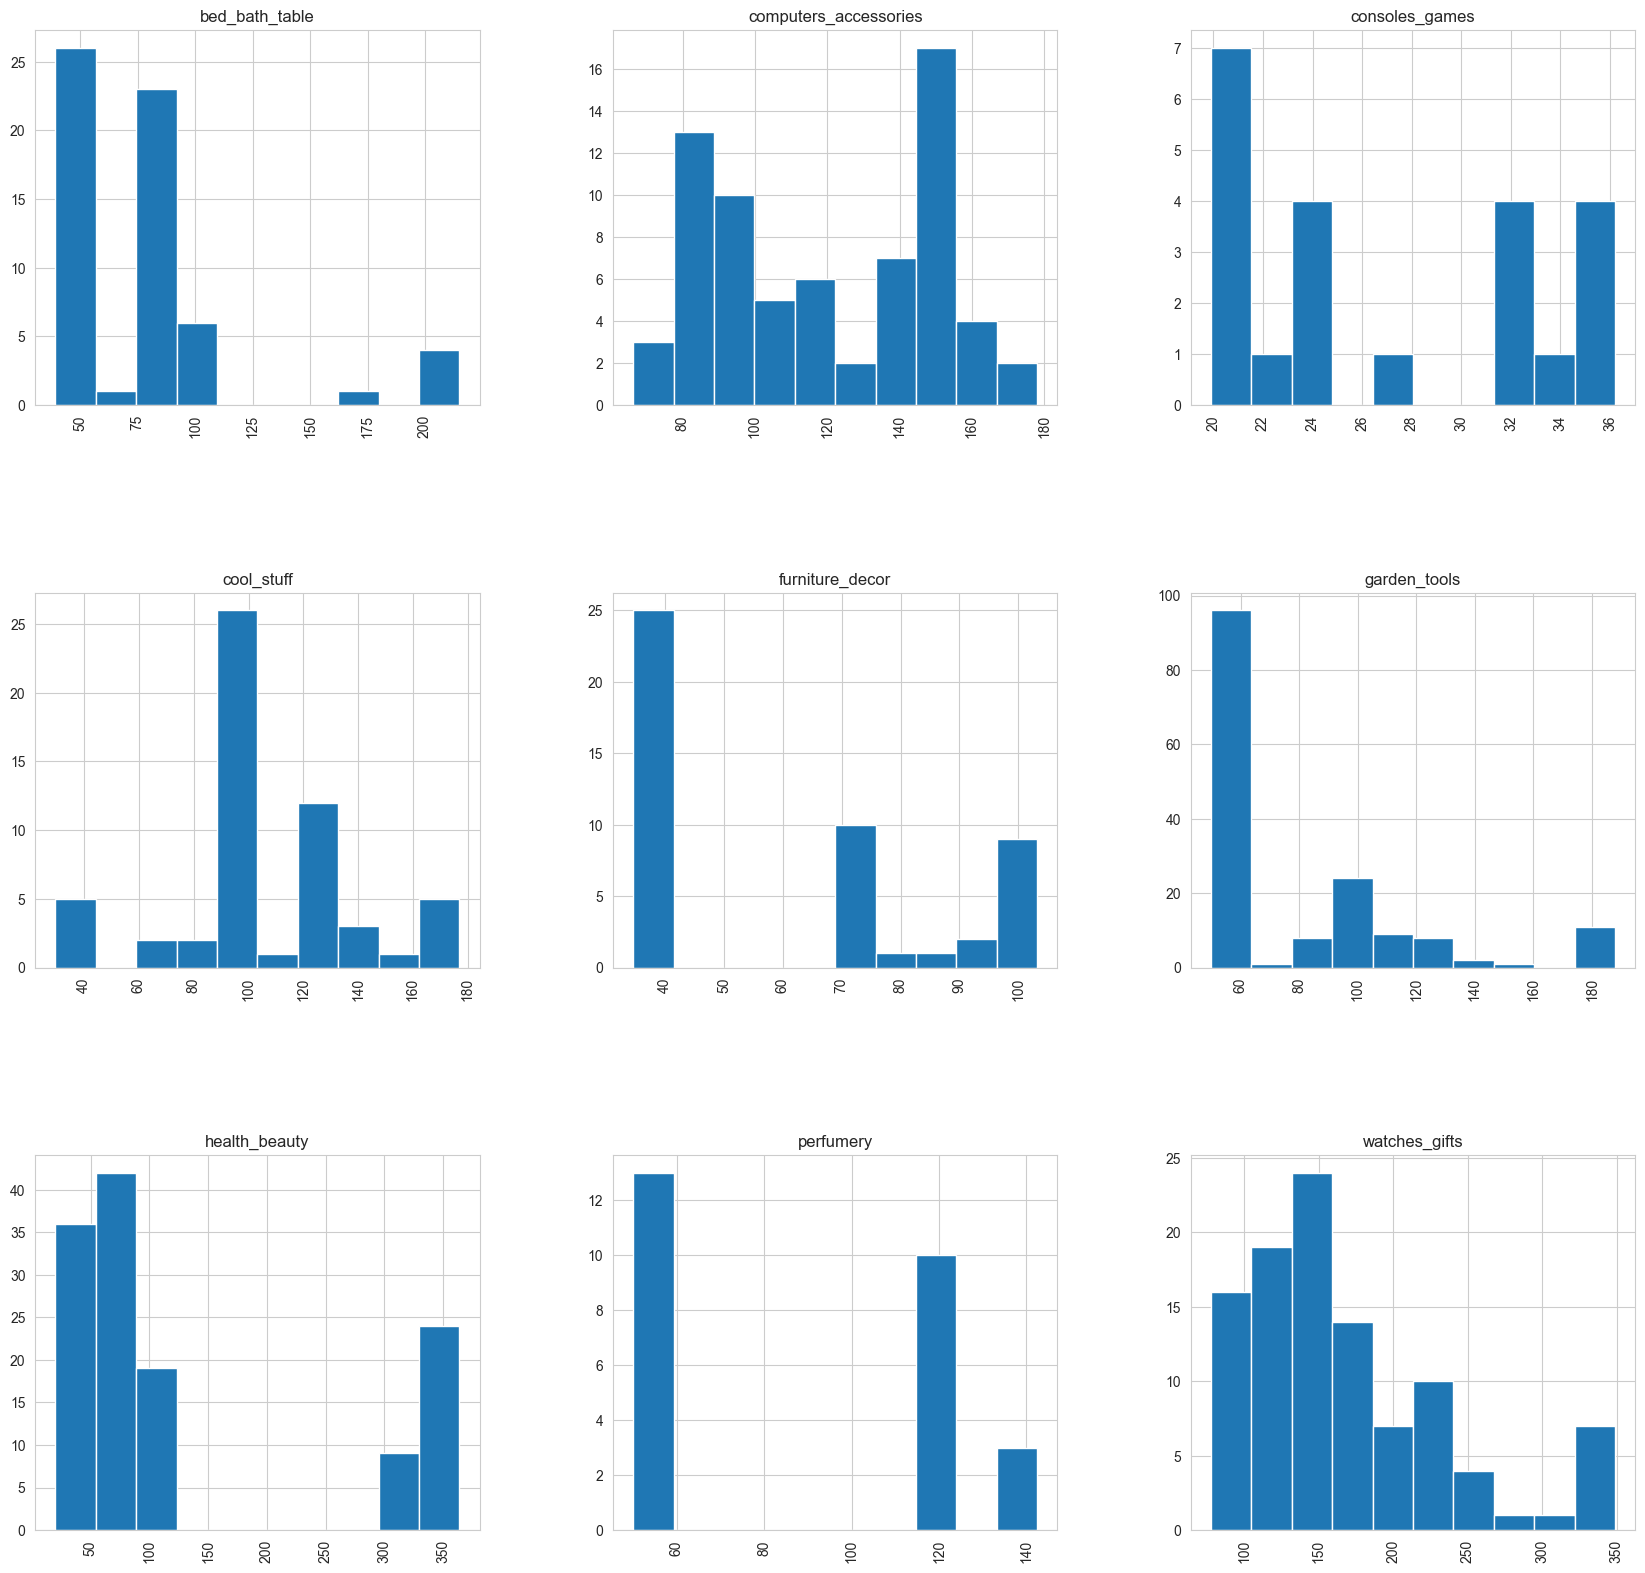

In [15]:
df.hist(figsize=(20,20),bins=10, by='product_category_name', column='unit_price')


# How do our prices compare to our competitors across various categorical variables?
* Overall, our prices (on average) are higher when compared to our competitors. Our prices are about 17% higher than our nearest competitor (comp 2) 
* This changes when we break out data across category areas (bear in mind the dataset imbalance between categories)
* When examining the affect of monthly characteristic (number of holidays in the month, number of weekend/weekday days in the month, etc) we see patterns closely matching our overall observation.

<Axes: title={'center': 'month'}, xlabel='month'>

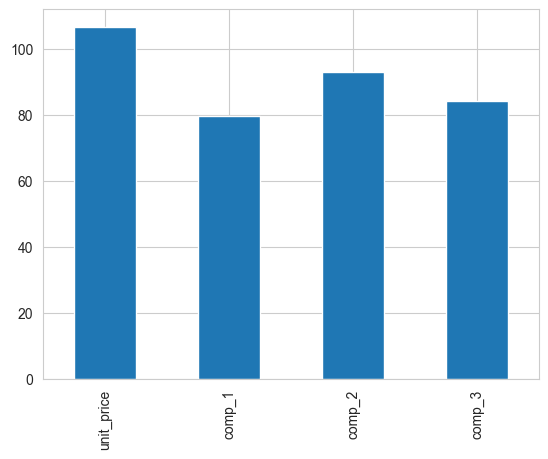

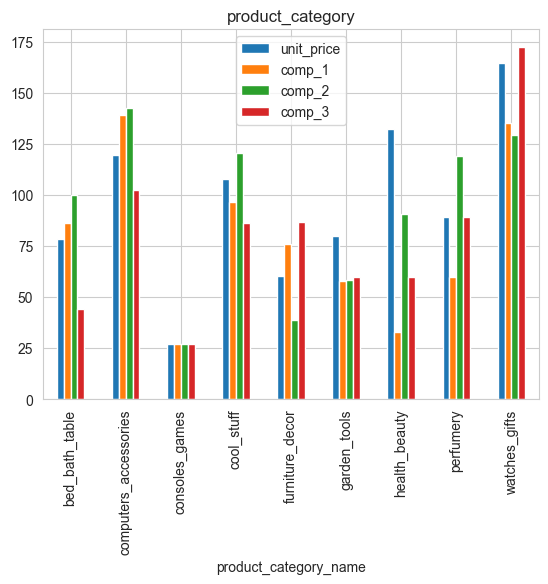

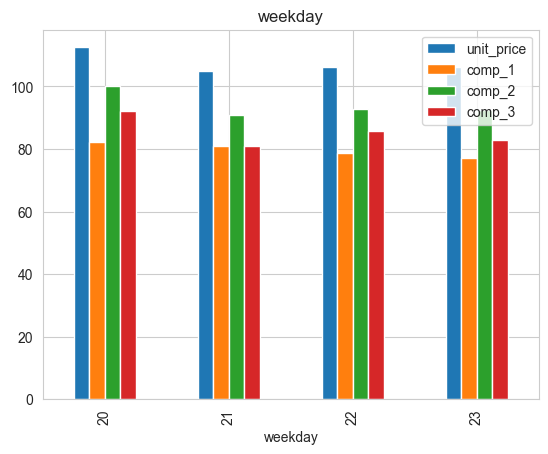

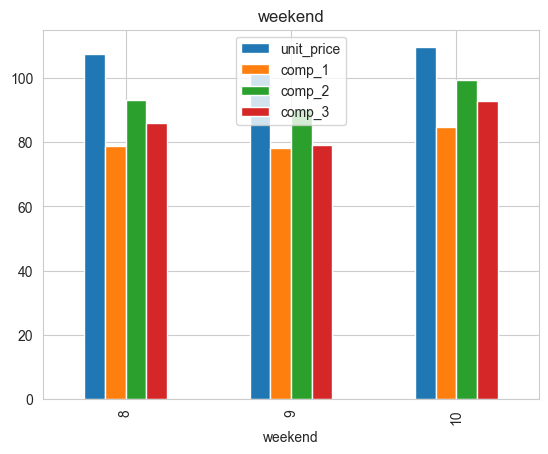

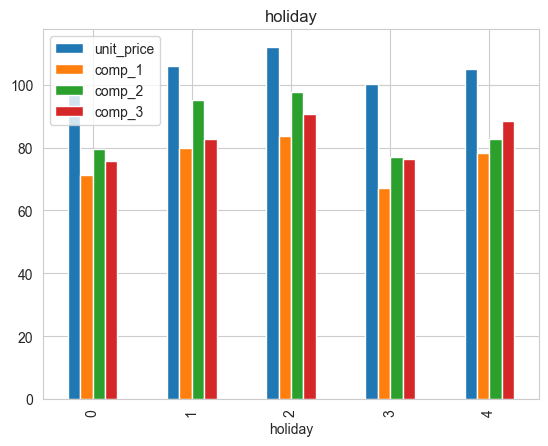

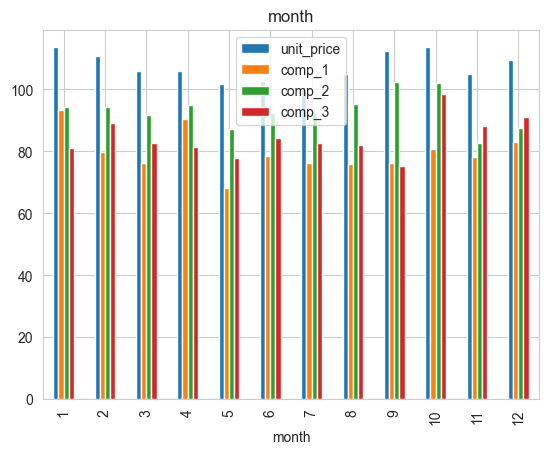

In [24]:
df[['unit_price', 'comp_1','comp_2', 'comp_3']].mean().plot(kind='bar')
df.groupby('product_category_name')[['unit_price','comp_1','comp_2','comp_3']].mean().plot(kind='bar', grid=True, title='product_category')
df.groupby('weekday')[['unit_price','comp_1', 'comp_2','comp_3']].mean().plot(kind='bar', grid=True, title='weekday')
df.groupby('weekend')[['unit_price','comp_1','comp_2','comp_3']].mean().plot(kind='bar', grid=True, title='weekend')
df.groupby('holiday')[['unit_price','comp_1','comp_2','comp_3']].mean().plot(kind='bar', grid=True, title='holiday')
df.groupby('month')[['unit_price','comp_1','comp_2', 'comp_3']].mean().plot(kind='bar', grid=True, title='month')

# Question: How does the distribution of unit price vary across product categories?
* Heath and beauty products and watch gifts have the greatest variability in unit prices. Large outliers skew the data
* For health and beauty, the separation between 25th and 75th percentiles is ~220. Our other variables have a better concentration of data around the mean

In [18]:
boxplot_style = {
        'boxprops': dict(facecolor='lightblue', edgecolor='blue', linewidth=2),
        'medianprops': dict(color='red', linewidth=2),
        'whiskerprops': dict(color='green', linewidth=1.5),
        'capprops': dict(color='purple', linewidth=1.5),
        'flierprops': dict(marker='o', markerfacecolor='orange', markersize=8)
    }

<Axes: title={'center': 'unit_price'}, xlabel='product_category_name'>

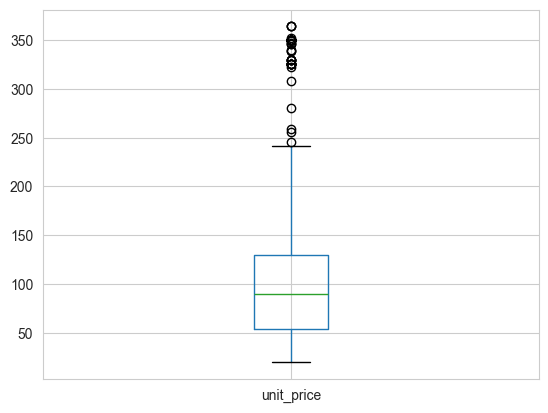

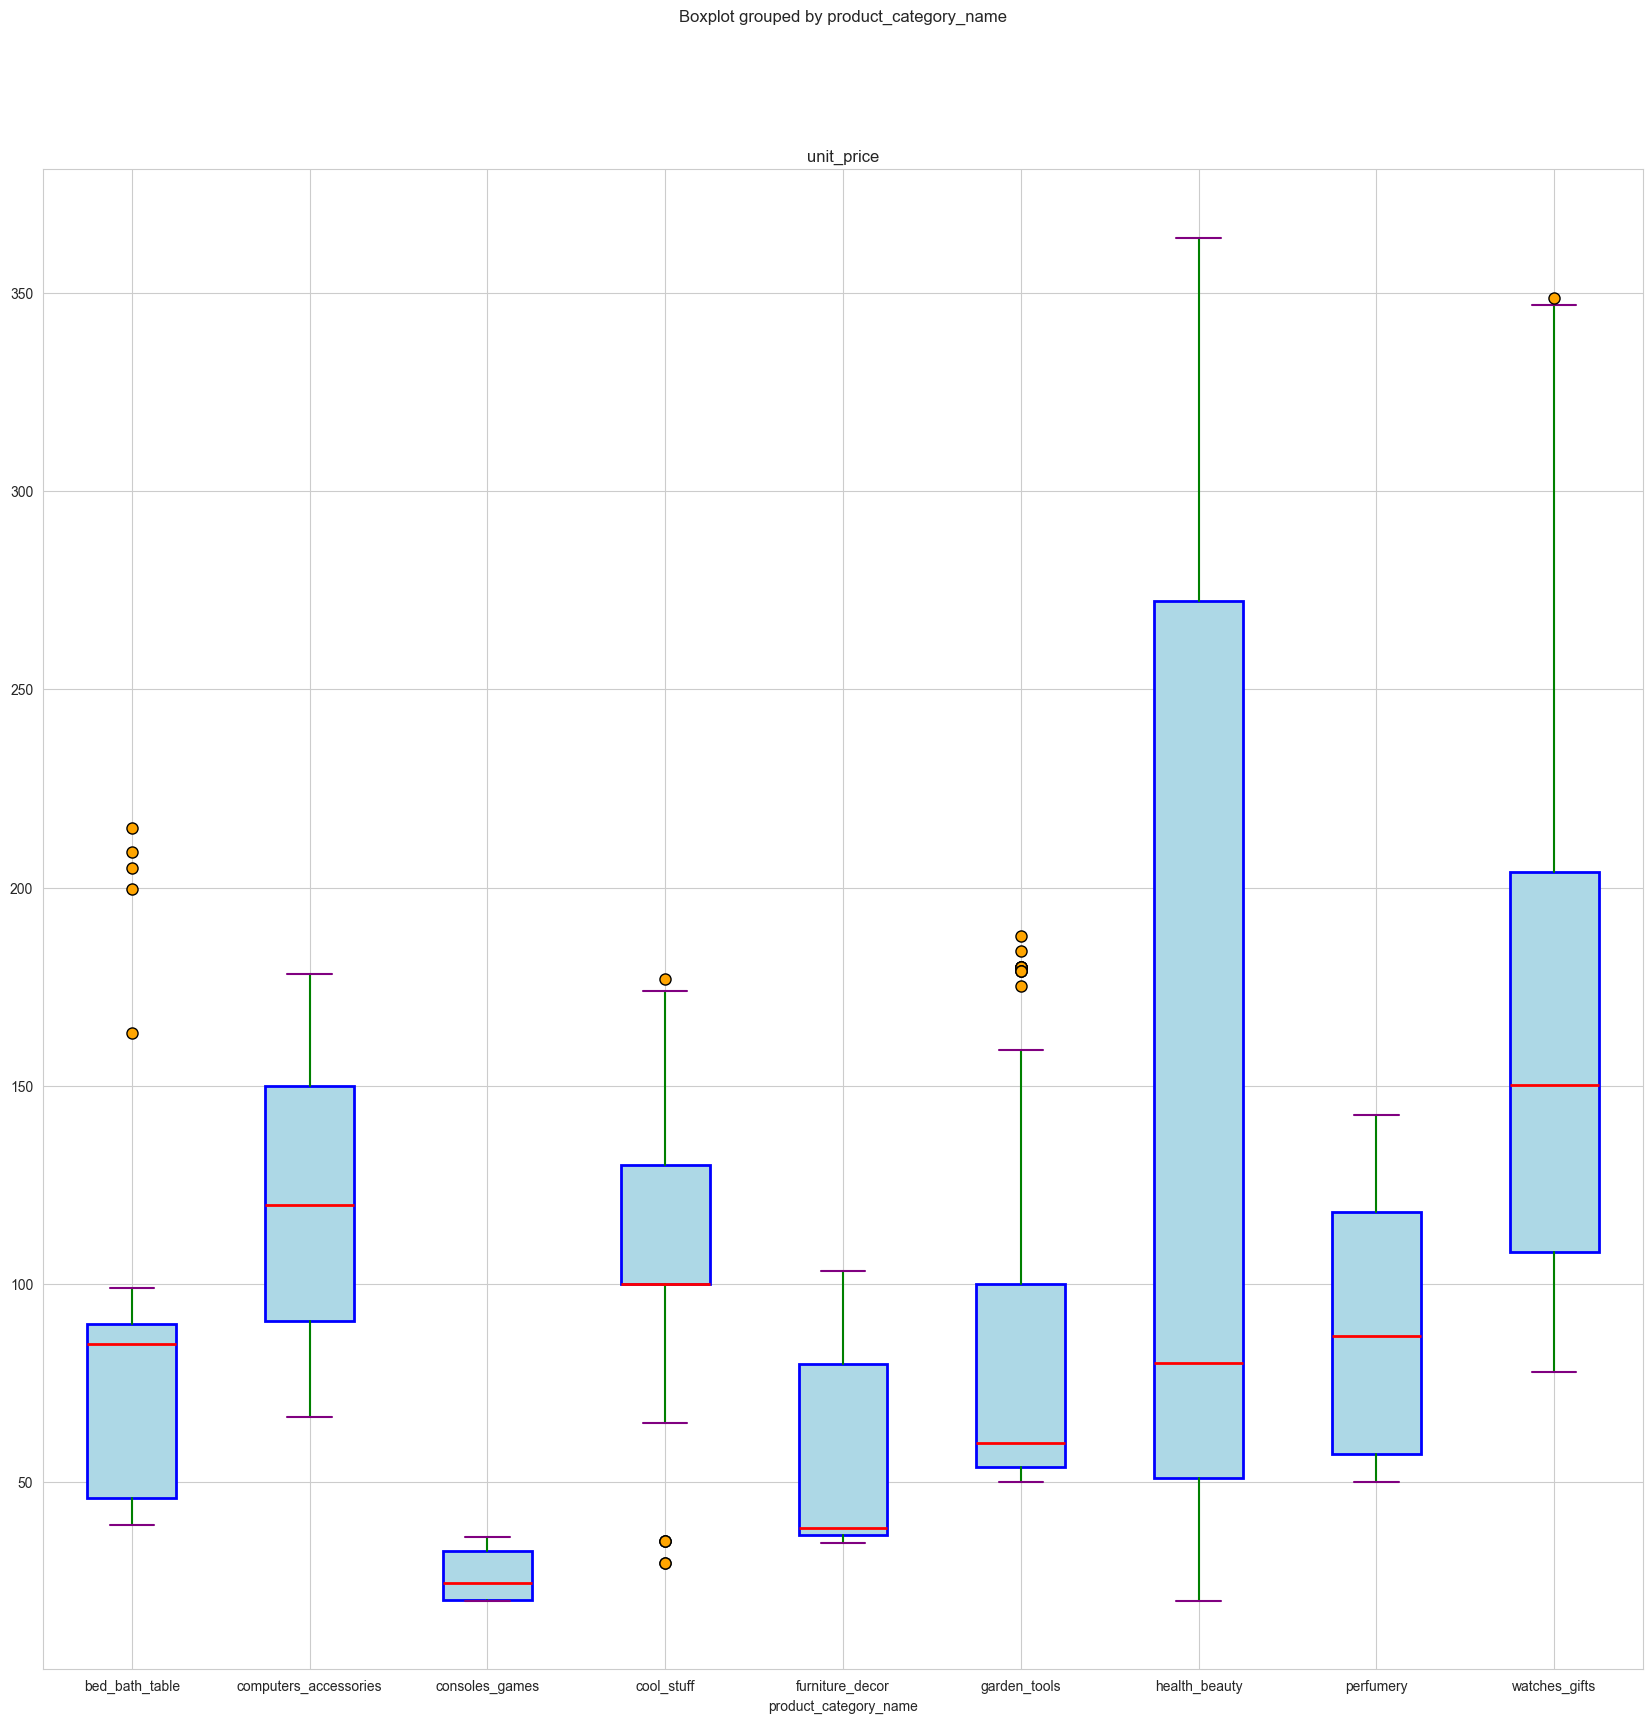

In [19]:
df.boxplot(column='unit_price')
df.boxplot(column='unit_price', by='product_category_name', figsize=(20,20), patch_artist=True, **boxplot_style)

# Feature Engineering 

In [20]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [27]:
data = df.drop(['product_id','month_year', 'product_weight_g','volume', 'year'], axis=1)

In [28]:
data

,product_category_name,qty,total_price,freight_price,unit_price,product_score,customers,weekday,weekend,holiday,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed_bath_table,1,45.95,15.100000,45.950000,4.0,57,23,8,1,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed_bath_table,3,137.85,12.933333,45.950000,4.0,61,22,8,1,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed_bath_table,6,275.70,14.840000,45.950000,4.0,123,21,10,1,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed_bath_table,4,183.80,14.287500,45.950000,4.0,90,23,8,1,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed_bath_table,2,91.90,15.100000,45.950000,4.0,54,21,9,1,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed_bath_table,1,215.00,8.760000,215.000000,4.4,57,23,8,1,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed_bath_table,10,2090.00,21.322000,209.000000,4.4,61,22,8,1,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed_bath_table,59,12095.00,22.195932,205.000000,4.4,123,21,10,1,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed_bath_table,52,10375.00,19.412885,199.509804,4.4,90,23,8,1,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


## Creating dummy variables for use in our model

In [29]:
data_w_dummies = pd.get_dummies(data, columns=['product_category_name','weekday', 'weekend', 'holiday', 'month'], drop_first=True, dtype=int)

In [30]:
data_w_dummies.head()

,qty,total_price,freight_price,unit_price,product_score,customers,s,comp_1,ps1,fp1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,45.95,15.100000,45.95,4.0,57,10.267394,89.9,3.9,15.011897,...,0,0,1,0,0,0,0,0,0,0
1,3,137.85,12.933333,45.95,4.0,61,6.503115,89.9,3.9,14.769216,...,0,0,0,1,0,0,0,0,0,0
2,6,275.70,14.840000,45.95,4.0,123,12.071651,89.9,3.9,13.993833,...,0,0,0,0,1,0,0,0,0,0
3,4,183.80,14.287500,45.95,4.0,90,9.293873,89.9,3.9,14.656757,...,0,0,0,0,0,1,0,0,0,0
4,2,91.90,15.100000,45.95,4.0,54,5.555556,89.9,3.9,18.776522,...,0,0,0,0,0,0,1,0,0,0


# Linear Regression Analysis
* Examining our regression model we can determine the features of particular interest are comp_2 price (p<.01) and product rating (p<.01), and lag price (p<.01). The greatest impact coming from our competitor's product score. -6.8646 impact per unit increase of competitor rating score. i.e. if the product has a rating of 1, our model would apply a $-6.86 reduction from our unit_pricing.

In [31]:
feats = data_w_dummies.drop(['unit_price', 'total_price', 'qty'], axis=1)
feats = sm.add_constant(feats)
model = sm.OLS(data_w_dummies['unit_price'],feats).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unit_price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1694.
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:50:27   Log-Likelihood:                -2315.3
No. Observations:                 676   AIC:                             4711.
Df Residuals:                     636   BIC:                             4891.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          19.8341     16.945      1.170      0.242     -13.441      53.109
freight_price                                   0.0733      0.042      1.746      0.081      -0.009       0.156
product_score                                   4.3195      1.806      2.391      0.017       0.772       7.867
customers                                      -0.0118      0.008     -1.534      0.126      -0.027       0.003
s                                              -0.0857      0.029     -2.993      0.003      -0.142      -0.029
comp_1                                          0.0125      0.014      0.904      0.366      -0.015       0.040
ps1                                            -1.5909      5.737     -0.277      0.782     -12.857       9.675
fp1                                             0.0179      0.082      0.217      0.828      -0.144       0.179
comp_2                                          0.0272      0.010      2.648      0.008       0.007       0.047
ps2                                            -6.8646      2.533     -2.710      0.007     -11.839      -1.890
fp2                                            -0.0854      0.089     -0.963      0.336      -0.260       0.089
comp_3                                          0.0356      0.017      2.085      0.037       0.002       0.069
ps3                                            -4.4991      2.727     -1.650      0.099      -9.854       0.856
fp3                                            -0.0867      0.095     -0.916      0.360      -0.273       0.099
lag_price                                       0.9746      0.005    188.154      0.000       0.964       0.985
product_category_name_computers_accessories    -3.2935      3.196     -1.030      0.303      -9.570       2.983
product_category_name_consoles_games            4.0693      2.638      1.542      0.123      -1.111       9.250
product_category_name_cool_stuff                3.6703      2.481      1.479      0.140      -1.202       8.542
product_category_name_furniture_decor           1.1557      2.150      0.537      0.591      -3.067       5.378
product_category_name_garden_tools              3.6155      1.890      1.913      0.056      -0.096       7.327
product_category_name_health_beauty             3.7115      2.680      1.385      0.167      -1.551       8.974
product_category_name_perfumery                 1.4687      3.236      0.454      0.650      -4.885       7.823
product_category_name_watches_gifts            -4.5475      3.145     -1.446      0.149     -10.724       1.629
weekday_21                                      6.2389      5.067      1.231      0.219      -3.711      16.189
weekday_22                                      3.2819     

In [33]:
model.params

const                                          19.834136
freight_price                                   0.073258
product_score                                   4.319500
customers                                      -0.011824
s                                              -0.085726
comp_1                                          0.012518
ps1                                            -1.590949
fp1                                             0.017861
comp_2                                          0.027207
ps2                                            -6.864615
fp2                                            -0.085409
comp_3                                          0.035612
ps3                                            -4.499131
fp3                                            -0.086698
lag_price                                       0.974571
product_category_name_computers_accessories    -3.293531
product_category_name_consoles_games            4.069273
product_category_name_cool_stuf

In [34]:
feats.T

,0,1,2,3,4,5,6,7,8,9,...,666,667,668,669,670,671,672,673,674,675
const,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
freight_price,15.100000,12.933333,14.840000,14.287500,15.100000,15.100000,15.832727,15.230000,16.533684,13.749444,...,15.226250,19.084286,12.055000,12.637500,24.690000,8.760000,21.322000,22.195932,19.412885,24.324687
product_score,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.200000,4.200000,4.200000,4.200000,4.200000,4.400000,4.400000,4.400000,4.400000,4.400000
customers,57.000000,61.000000,123.000000,90.000000,54.000000,50.000000,97.000000,41.000000,62.000000,62.000000,...,43.000000,34.000000,57.000000,43.000000,26.000000,57.000000,61.000000,123.000000,90.000000,54.000000
s,10.267394,6.503115,12.071651,9.293873,5.555556,8.333333,30.555556,16.666667,17.757009,16.822430,...,13.793103,12.068966,3.448276,6.896552,3.448276,0.649351,6.493506,38.311688,33.766234,20.779221
comp_1,89.900000,89.900000,89.900000,89.900000,89.900000,89.900000,89.900000,88.488235,86.900000,86.900000,...,86.900000,85.045000,83.649615,79.900000,77.933333,89.900000,89.900000,89.900000,89.900000,89.900000
ps1,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,...,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000
fp1,15.011897,14.769216,13.993833,14.656757,18.776522,21.572143,16.294000,18.898333,19.383529,19.209091,...,19.982353,12.940000,16.780385,23.005652,19.952000,15.011897,14.769216,13.993833,14.656757,18.776522
comp_2,215.000000,209.000000,205.000000,199.509804,163.398710,45.950000,40.531818,39.990000,39.990000,39.990000,...,47.900000,47.900000,47.900000,47.900000,47.900000,215.000000,209.000000,205.000000,199.509804,163.398710
ps2,4.400000,4.400000,4.400000,4.400000,4.400000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.200000,4.200000,4.200000,4.200000,4.200000,4.400000,4.400000,4.400000,4.400000,4.400000


In [35]:
feats.columns

Index(['const', 'freight_price', 'product_score', 'customers', 's', 'comp_1',
       'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       'lag_price', 'product_category_name_computers_accessories',
       'product_category_name_consoles_games',
       'product_category_name_cool_stuff',
       'product_category_name_furniture_decor',
       'product_category_name_garden_tools',
       'product_category_name_health_beauty',
       'product_category_name_perfumery',
       'product_category_name_watches_gifts', 'weekday_21', 'weekday_22',
       'weekday_23', 'weekend_9', 'weekend_10', 'holiday_1', 'holiday_2',
       'holiday_3', 'holiday_4', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

# Machine Learning Modeling and Evaluation
* Our baseline model reaffirms the importance of lag price, but according to model coefficients, this is our most important feature. Reinforced by our shap analysis
* Additional models were used for comparision sake, but the best performance achieved was a RMSE of 7.3739 by our pytorch linear model
* Ridge regression was tested but hardly yielded model improvements due to lack of high correlations across feature variables
* Additional feature engineering conducted to retrain new model to compare performance. Initial features yielded stronger performing model
* Further optimizations include exploring RL applications to train an agent to monitor the action space and optimize decision making

In [36]:
x = feats.drop('const', axis=1)
y = data_w_dummies['unit_price']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
x_test_scaled = scaler.transform(x_test)

In [39]:
lin_reg.coef_

array([ 1.06786438e+00,  9.85809220e-01, -9.74873665e-01, -1.00127077e+00,
        1.67260140e-01, -4.62909195e-01,  9.86150500e-01,  1.42070299e+00,
       -1.47442896e+00, -5.83200123e-01,  1.73869814e+00, -1.44892853e+00,
       -7.97625748e-01,  7.54334895e+01, -1.54514251e+00,  7.33128680e-01,
        1.31926883e+00,  6.79426246e-01,  1.94687177e+00,  1.87511970e+00,
        7.52043744e-01, -1.08062635e+00,  2.78054079e+00,  6.80792458e-01,
        4.33833026e-02, -1.10718553e+00, -1.76318833e+00, -3.31112543e-01,
        2.58914563e+00, -1.50140991e-01,  5.00154842e-01, -7.25821204e-01,
        1.25598971e+00,  5.49212004e-01,  1.86706855e+00,  5.29709432e-01,
        1.26058610e+00,  1.61080370e+00, -2.69303639e-01,  7.15988237e-02,
        5.00154842e-01,  2.16904753e+00])

(0.0, 77.43348951837679)

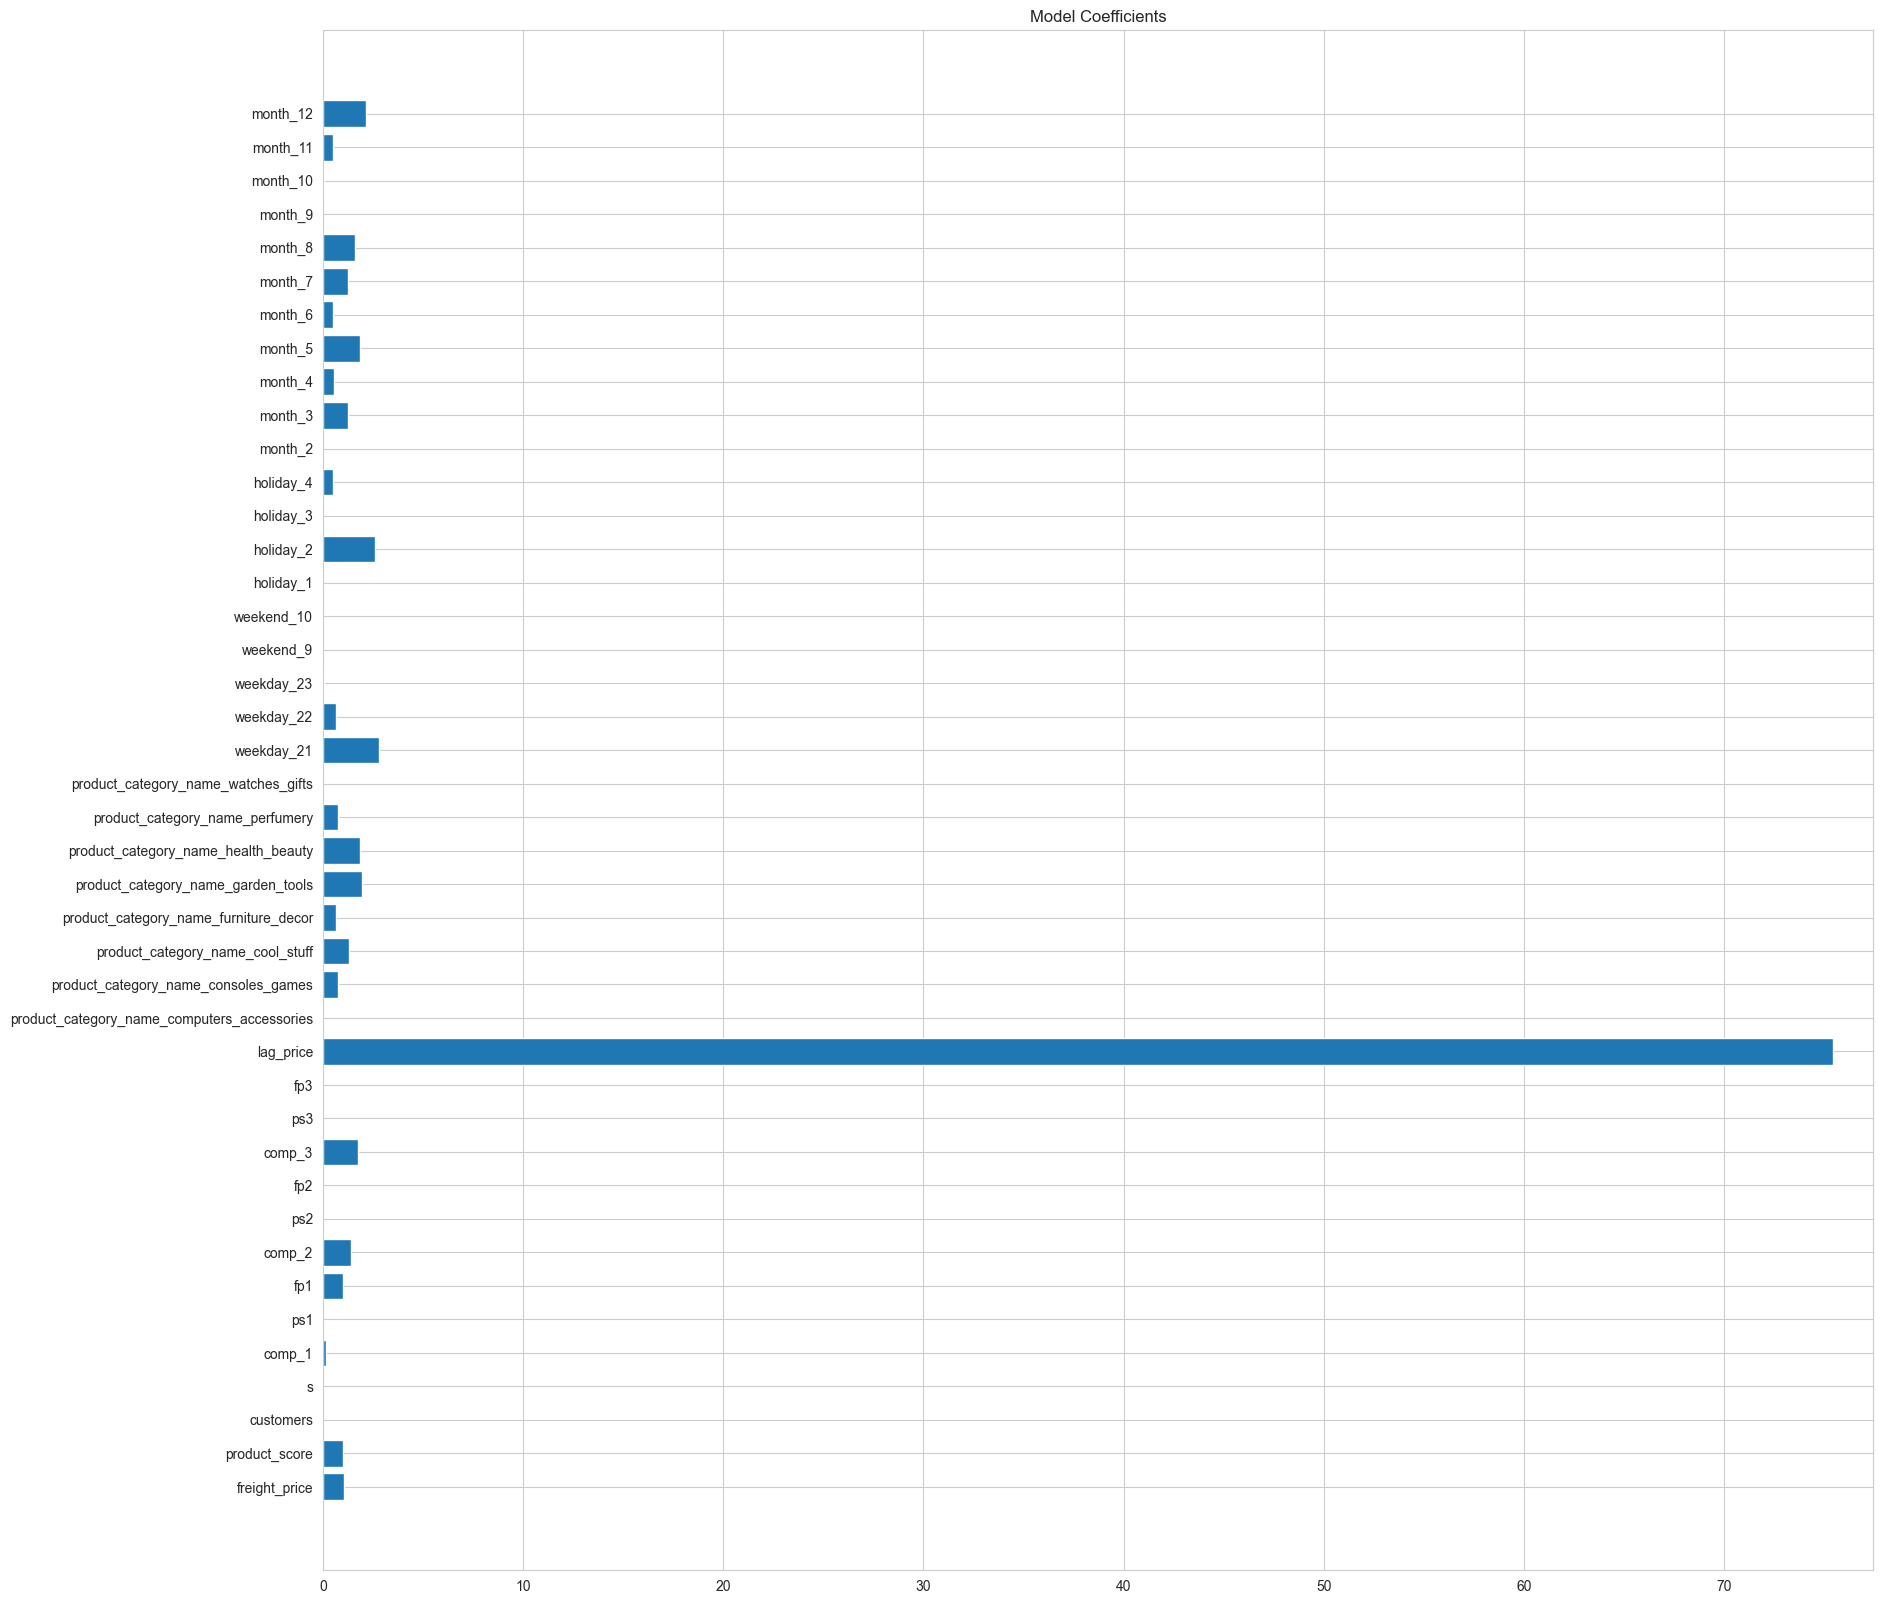

In [40]:
plt.figure(figsize=(20,20))
plt.barh(x_test.columns, lin_reg.coef_,);plt.title('Model Coefficients'); plt.xlim(0,(max(lin_reg.coef_) + 2))

In [42]:
max(lin_reg.coef_), min(lin_reg.coef_)

(np.float64(75.43348951837679), np.float64(-1.763188333122775))

In [43]:
np.mean(lin_reg.coef_), np.median(lin_reg.coef_)

(np.float64(2.185672940321518), np.float64(0.5394607176111863))

In [44]:
np.sum(lin_reg.coef_) - np.max(lin_reg.coef_)

np.float64(16.36477397512695)

In [45]:
from sklearn.metrics import mean_squared_error

base_preds = lin_reg.predict(x_test_scaled)
print(f'Root MSE: {np.sqrt(mean_squared_error(y_test, base_preds))}')

Root MSE: 7.9624130115045135


In [46]:
from sklearn.linear_model import Ridge
alphas = 10**np.linspace(10,-2,100)
model_names = []
scores = []
mse = []
for i in alphas:
    ridge = Ridge(alpha=i)
    ridge.fit(x_scaled, y_train)
    y_pred = ridge.predict(x_test_scaled)
    mse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    scores.append(ridge.score(x_test_scaled, y_test))
    model_names.append(i)

ridge_scores = pd.DataFrame(data={'Alpha': model_names, 'scores':scores, 'rmse':mse})


In [47]:
ridge_scores

,Alpha,scores,rmse
0,1.000000e+10,-0.016529,74.105266
1,7.564633e+09,-0.016529,74.105263
2,5.722368e+09,-0.016529,74.105260
3,4.328761e+09,-0.016529,74.105256
4,3.274549e+09,-0.016529,74.105251
...,...,...,...
95,3.053856e-02,0.988267,7.961632
96,2.310130e-02,0.988266,7.961821
97,1.747528e-02,0.988266,7.961965
98,1.321941e-02,0.988265,7.962073


In [48]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

<Axes: xlabel='Alpha'>

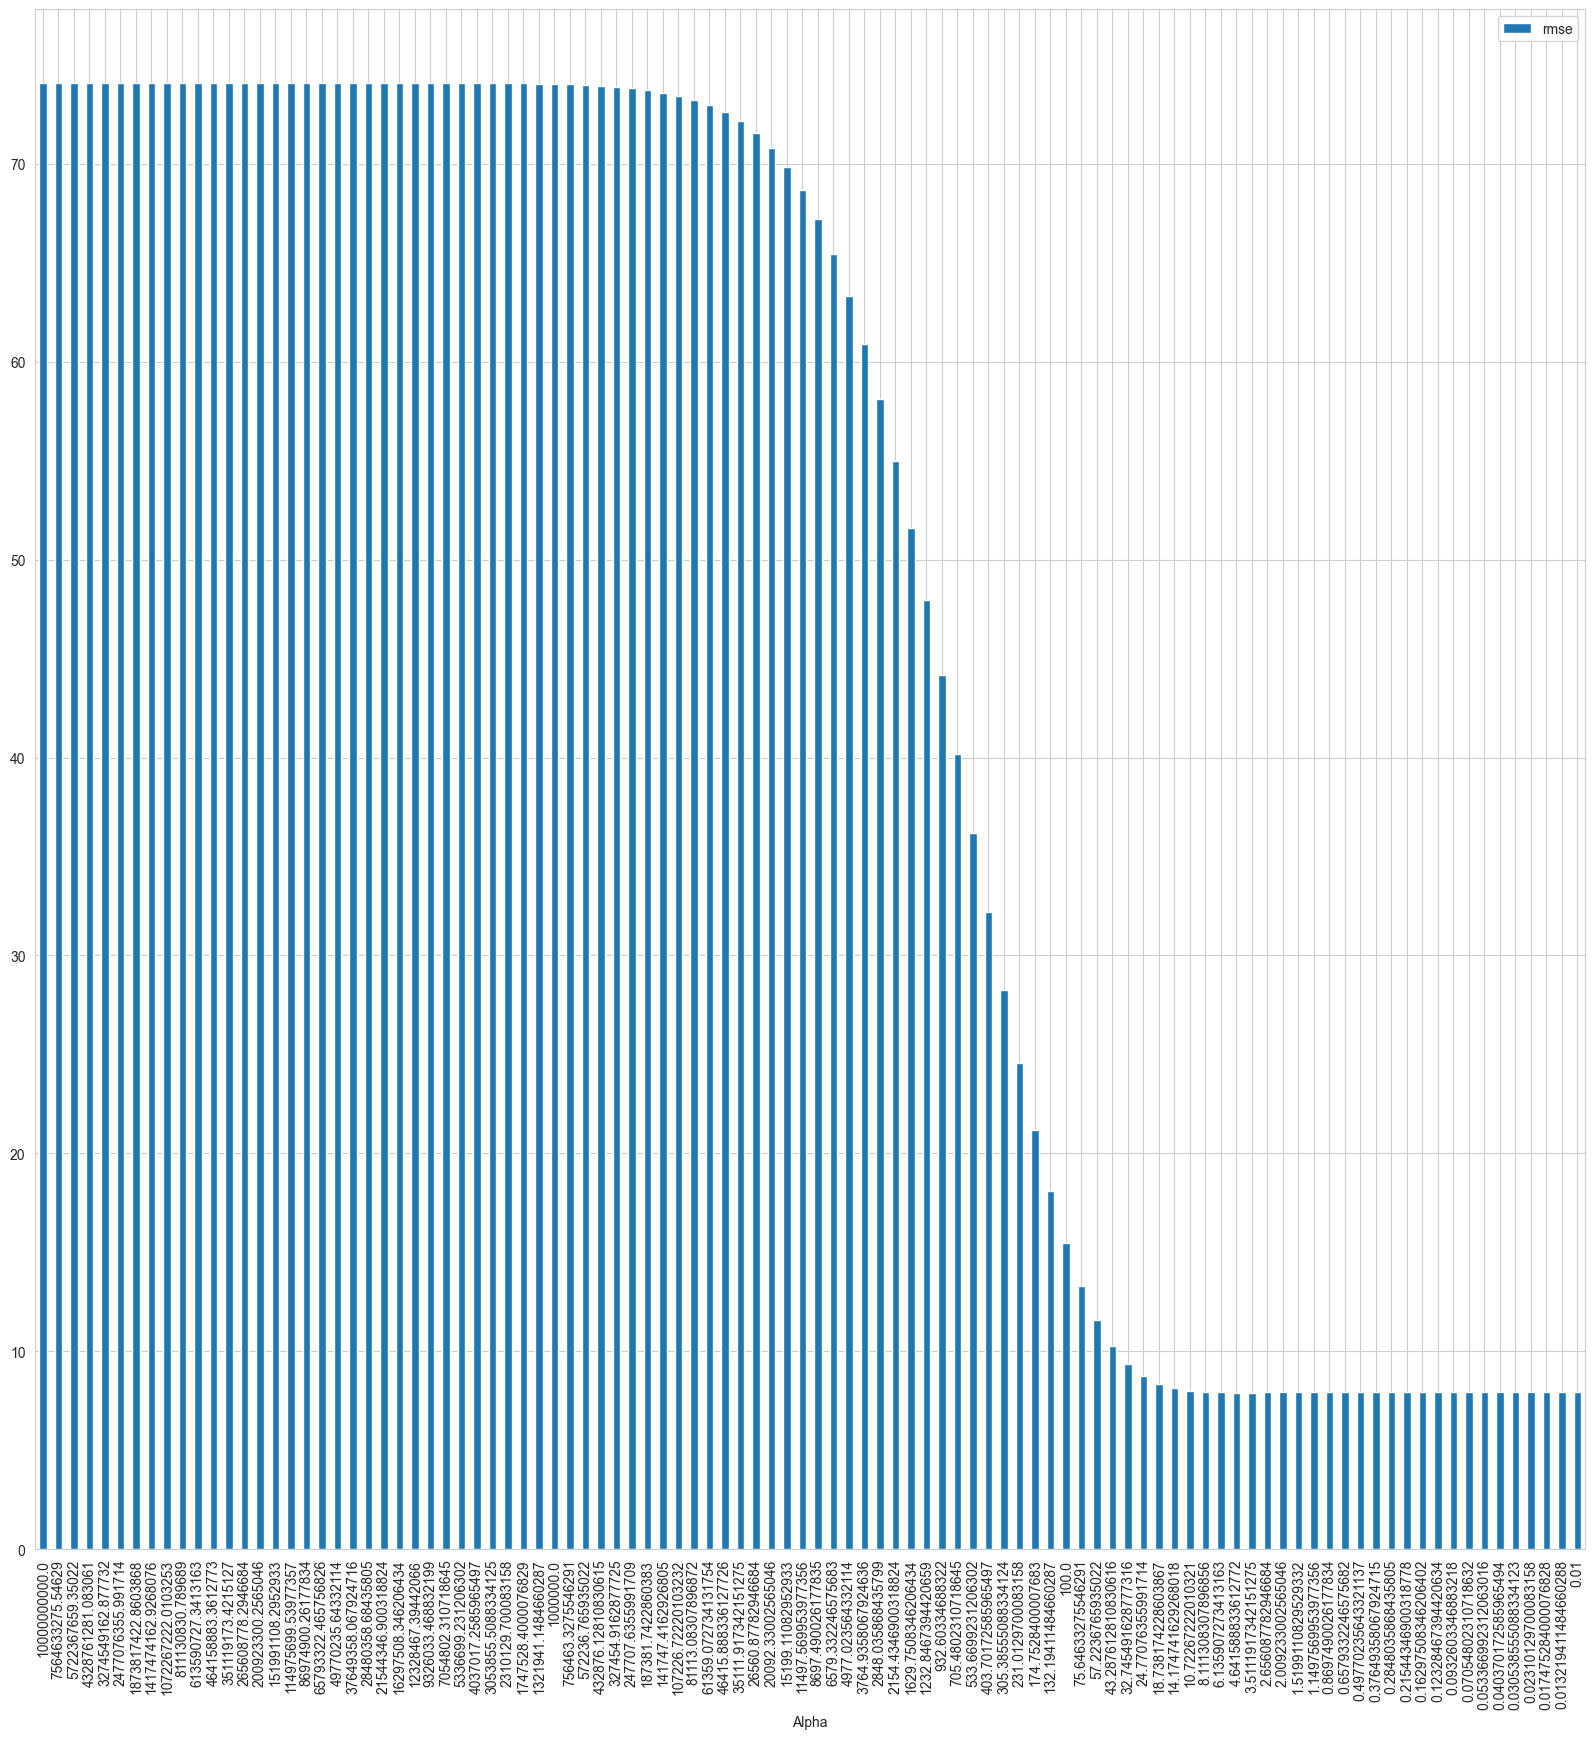

In [49]:
ridge_scores.plot(kind='bar', x='Alpha', y='rmse', figsize=(20,20))

<Axes: xlabel='Alpha', ylabel='rmse'>

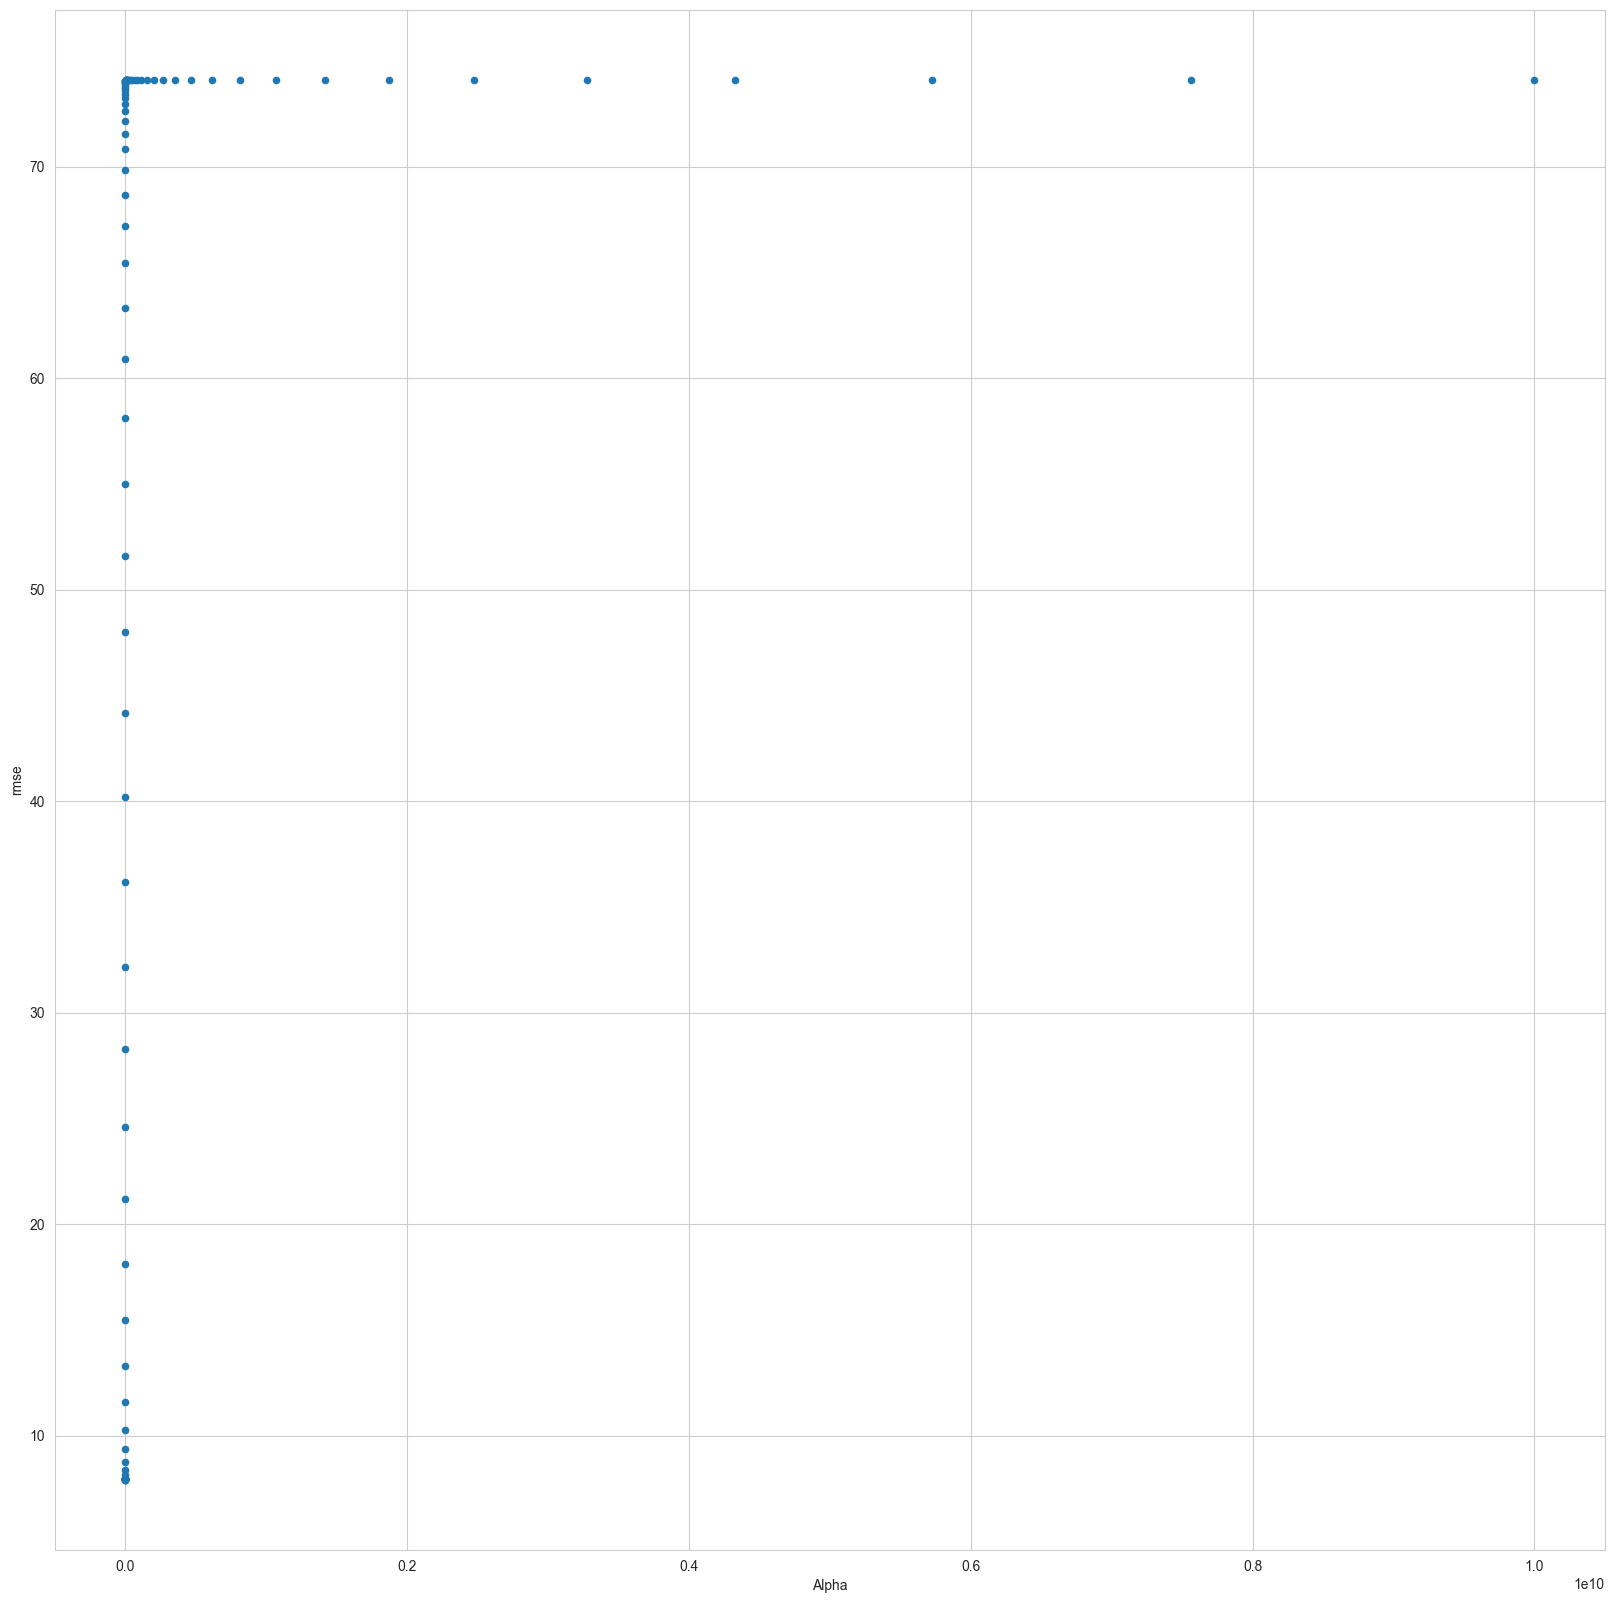

In [50]:
ridge_scores.plot(kind='scatter', x='Alpha', y='rmse', figsize=(20,20))


In [51]:
x_train.shape

(540, 42)

In [52]:
len(x_train.columns)

42

In [53]:
import torch
from torch.autograd import Variable
class LinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(42, 1) 

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [54]:
our_model = LinearRegressionModel()
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.03)

In [55]:
x_scaled.shape

(540, 42)

In [56]:
xtrain = torch.from_numpy(x_scaled)
ytrain = torch.tensor(list(y_train))
xtest = torch.from_numpy(x_test_scaled)
ytest = torch.tensor(list(y_test))

In [57]:
x_scaled.mean()

np.float64(-3.504936885500935e-17)

In [58]:
xtrain.shape

torch.Size([540, 42])

In [59]:
epochs = []
losses = []
for epoch in range(500):

    # Forward pass: Compute predicted y by passing 
    # x to the model
    pred_y = our_model(xtrain.to(torch.float32))

    # Compute and print loss
    loss = criterion(pred_y.squeeze(), ytrain.float())

    # Zero gradients, perform a backward pass, 
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))
    losses.append(loss.item())
    epochs.append(epoch)

    

epoch 0, loss 17574.482421875
epoch 1, loss 15000.75390625
epoch 2, loss 12945.5087890625
epoch 3, loss 11263.94921875
epoch 4, loss 9861.2744140625
epoch 5, loss 8673.591796875
epoch 6, loss 7656.4453125
epoch 7, loss 6777.857421875
epoch 8, loss 6014.05322265625
epoch 9, loss 5346.80419921875
epoch 10, loss 4761.7412109375
epoch 11, loss 4247.27099609375
epoch 12, loss 3793.851806640625
epoch 13, loss 3393.512939453125
epoch 14, loss 3039.509521484375
epoch 15, loss 2726.079345703125
epoch 16, loss 2448.2666015625
epoch 17, loss 2201.779541015625
epoch 18, loss 1982.889404296875
epoch 19, loss 1788.341552734375
epoch 20, loss 1615.2900390625
epoch 21, loss 1461.2391357421875
epoch 22, loss 1323.99609375
epoch 23, loss 1201.6339111328125
epoch 24, loss 1092.454345703125
epoch 25, loss 994.9606323242188
epoch 26, loss 907.8316650390625
epoch 27, loss 829.9011840820312
epoch 28, loss 760.1386108398438
epoch 29, loss 697.633056640625
epoch 30, loss 641.578369140625
epoch 31, loss 591.260

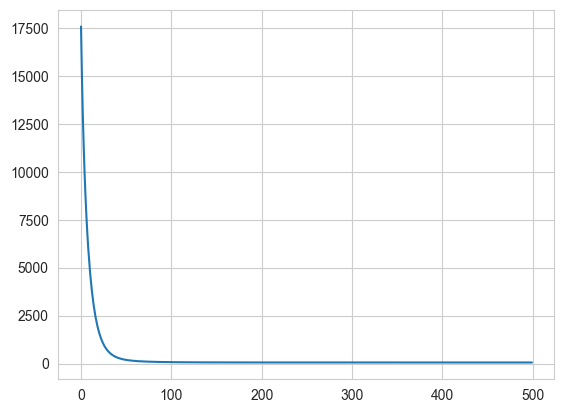

In [85]:
plt.plot(epochs, losses)

In [89]:
preds = our_model(xtest.to(torch.float32))

In [90]:
preds

tensor([[227.5095],
        [131.2859],
        [101.1154],
        [ 73.1745],
        [ 97.6610],
        [ 55.7167],
        [173.5151],
        [ 54.0354],
        [ 45.8666],
        [103.3741],
        [ 54.1233],
        [176.0344],
        [ 78.7345],
        [139.2053],
        [ 86.6171],
        [ 96.6611],
        [130.0045],
        [ 32.8028],
        [121.8666],
        [ 42.0368],
        [ 59.8950],
        [143.5530],
        [ 66.5705],
        [ 51.9510],
        [ 54.4777],
        [ 98.3826],
        [215.0644],
        [ 55.0232],
        [126.0134],
        [138.1265],
        [ 31.1187],
        [162.3620],
        [ 18.7413],
        [ 93.1238],
        [101.1557],
        [ 37.4471],
        [ 23.3145],
        [ 55.7469],
        [210.9598],
        [138.8127],
        [156.0053],
        [ 36.1106],
        [ 58.7635],
        [ 45.1573],
        [345.8921],
        [ 55.5375],
        [ 20.0218],
        [ 82.0493],
        [ 72.8972],
        [349.0306],


In [63]:
ytest

tensor([174.4333, 129.9900,  99.9000,  77.8214,  99.9900,  52.9000, 151.8784,
         53.3791,  45.9000, 105.0000,  49.9000, 164.5700,  78.0000, 134.9900,
         84.9900, 103.7925, 129.9900,  29.9000, 122.9900,  38.4000,  59.9000,
        145.9943,  64.9900,  53.9000,  53.6483,  84.6925, 215.0000,  53.9000,
        128.2417, 151.9900,  29.9000, 166.9900,  19.9000,  89.9900,  99.9900,
         35.0000,  19.9900,  56.9900, 209.0000, 134.9900, 159.9900,  39.9900,
         59.9000,  51.0250, 349.9000,  49.9000,  19.9000,  78.0000,  78.0000,
        349.9000,  49.9000,  38.4000,  89.9000, 239.9000, 118.7000,  78.0000,
         45.9500,  50.7100,  79.9900,  99.9900,  23.9900, 149.9000,  79.9900,
         58.9900,  19.9000,  58.9900, 146.9900,  84.9900, 132.5312,  89.9900,
         53.9000, 118.0500,  19.9900, 349.9000,  19.9000,  23.9900,  88.0000,
         49.9800,  59.9000,  23.9900,  78.0000, 139.0000, 325.0000,  96.6567,
        136.1429,  35.4857,  61.9900,  65.0000,  23.9900,  38.40

In [64]:
our_model.eval()

LinearRegressionModel(
  (linear): Linear(in_features=42, out_features=1, bias=True)
)

In [65]:
for name, param in our_model.state_dict().items():
    print(f"Layer: {name}, Parameters: {param.shape}")
    print(param)

Layer: linear.weight, Parameters: torch.Size([1, 42])
tensor([[ 1.1155e+00,  9.4472e-01, -9.3997e-01, -1.0051e+00,  1.4630e-01,
         -2.1177e-01,  8.0812e-01,  1.3464e+00, -1.4411e+00, -6.2806e-01,
          1.5809e+00, -1.3222e+00, -7.6752e-01,  7.5434e+01, -1.4838e+00,
          5.9059e-01,  1.1213e+00,  5.2308e-01,  1.6643e+00,  1.4849e+00,
          5.5416e-01, -1.1330e+00,  7.4595e-01, -3.7489e-01,  5.2576e-01,
         -7.0958e-03, -3.6061e-01, -4.0253e-01,  1.9740e-01, -2.6135e-01,
          2.2209e-01, -3.8034e-01,  7.0004e-03, -1.0899e-01,  4.4298e-01,
         -8.4194e-02,  4.7172e-02,  1.2531e-03, -7.2968e-01,  4.0445e-01,
          2.8508e-01,  1.1833e+00]])
Layer: linear.bias, Parameters: torch.Size([1])
tensor([108.3979])


In [66]:
our_model.state_dict().items()

odict_items([('linear.weight', tensor([[ 1.1155e+00,  9.4472e-01, -9.3997e-01, -1.0051e+00,  1.4630e-01,
         -2.1177e-01,  8.0812e-01,  1.3464e+00, -1.4411e+00, -6.2806e-01,
          1.5809e+00, -1.3222e+00, -7.6752e-01,  7.5434e+01, -1.4838e+00,
          5.9059e-01,  1.1213e+00,  5.2308e-01,  1.6643e+00,  1.4849e+00,
          5.5416e-01, -1.1330e+00,  7.4595e-01, -3.7489e-01,  5.2576e-01,
         -7.0958e-03, -3.6061e-01, -4.0253e-01,  1.9740e-01, -2.6135e-01,
          2.2209e-01, -3.8034e-01,  7.0004e-03, -1.0899e-01,  4.4298e-01,
         -8.4194e-02,  4.7172e-02,  1.2531e-03, -7.2968e-01,  4.0445e-01,
          2.8508e-01,  1.1833e+00]])), ('linear.bias', tensor([108.3979]))])

In [67]:
our_model.state_dict().items().mapping

mappingproxy({'linear.weight': tensor([[ 1.1155e+00,  9.4472e-01, -9.3997e-01, -1.0051e+00,  1.4630e-01,
                       -2.1177e-01,  8.0812e-01,  1.3464e+00, -1.4411e+00, -6.2806e-01,
                        1.5809e+00, -1.3222e+00, -7.6752e-01,  7.5434e+01, -1.4838e+00,
                        5.9059e-01,  1.1213e+00,  5.2308e-01,  1.6643e+00,  1.4849e+00,
                        5.5416e-01, -1.1330e+00,  7.4595e-01, -3.7489e-01,  5.2576e-01,
                       -7.0958e-03, -3.6061e-01, -4.0253e-01,  1.9740e-01, -2.6135e-01,
                        2.2209e-01, -3.8034e-01,  7.0004e-03, -1.0899e-01,  4.4298e-01,
                       -8.4194e-02,  4.7172e-02,  1.2531e-03, -7.2968e-01,  4.0445e-01,
                        2.8508e-01,  1.1833e+00]]),
              'linear.bias': tensor([108.3979])})

In [68]:
our_model.state_dict()['linear.weight']

tensor([[ 1.1155e+00,  9.4472e-01, -9.3997e-01, -1.0051e+00,  1.4630e-01,
         -2.1177e-01,  8.0812e-01,  1.3464e+00, -1.4411e+00, -6.2806e-01,
          1.5809e+00, -1.3222e+00, -7.6752e-01,  7.5434e+01, -1.4838e+00,
          5.9059e-01,  1.1213e+00,  5.2308e-01,  1.6643e+00,  1.4849e+00,
          5.5416e-01, -1.1330e+00,  7.4595e-01, -3.7489e-01,  5.2576e-01,
         -7.0958e-03, -3.6061e-01, -4.0253e-01,  1.9740e-01, -2.6135e-01,
          2.2209e-01, -3.8034e-01,  7.0004e-03, -1.0899e-01,  4.4298e-01,
         -8.4194e-02,  4.7172e-02,  1.2531e-03, -7.2968e-01,  4.0445e-01,
          2.8508e-01,  1.1833e+00]])

(-1.4837599992752075, 77.43406677246094)

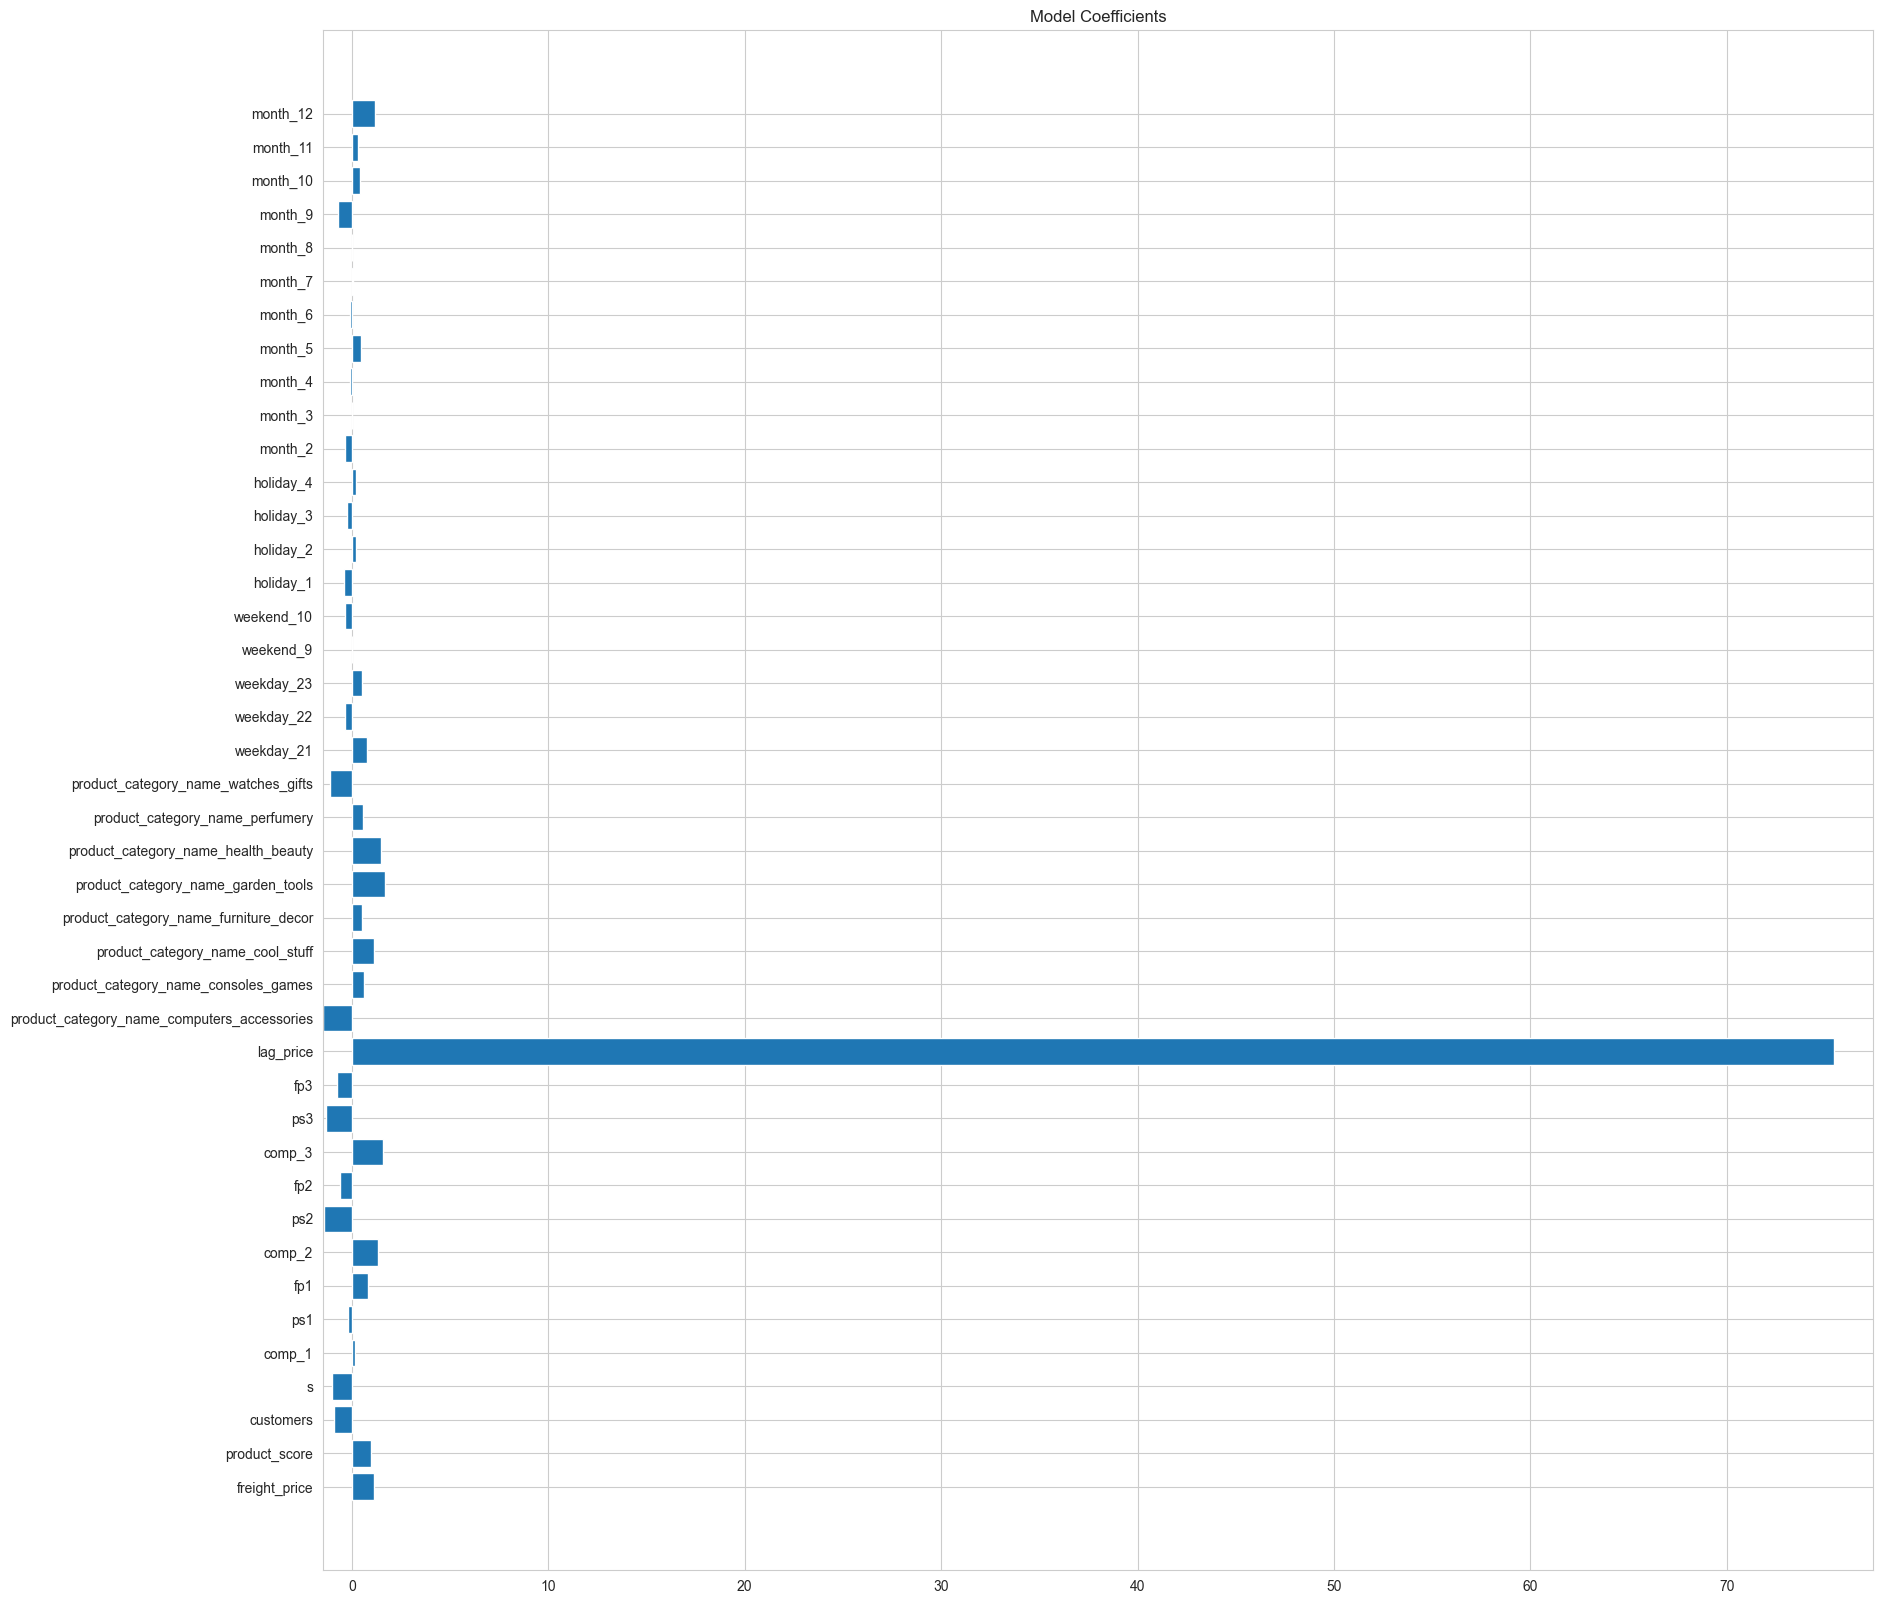

In [69]:
plt.figure(figsize=(20,20))
plt.barh(x_test.columns, our_model.state_dict()['linear.weight'][0]);plt.title('Model Coefficients'); plt.xlim((min(our_model.state_dict()['linear.weight'][0])),(max(our_model.state_dict()['linear.weight'][0]) + 2))

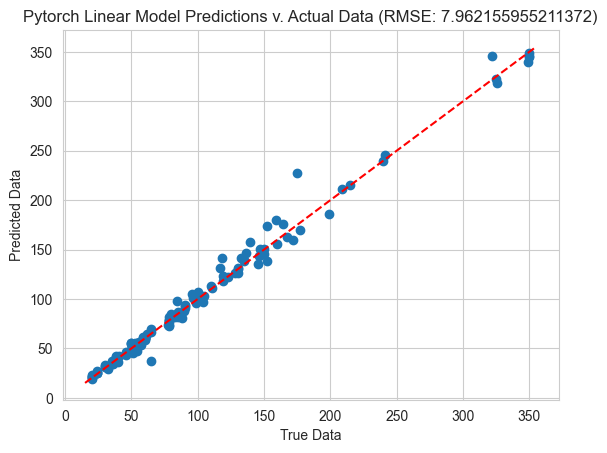

In [108]:
plt.scatter(y_test, preds.detach().numpy())
plt.title(f'Pytorch Linear Model Predictions v. Actual Data (RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))})')
plt.xlabel('True Data')
plt.ylabel('Predicted Data')
plt.plot([15,355], [15,355], color='red', linestyle='--')
plt.show()

In [95]:
np.sqrt(mean_squared_error(y_test, preds.detach().numpy()))

np.float64(7.931335085970901)

In [70]:
our_model.eval()

LinearRegressionModel(
  (linear): Linear(in_features=42, out_features=1, bias=True)
)

In [82]:
import shap

explainer = shap.DeepExplainer(our_model, xtrain.to(torch.float32))
shap_values = explainer.shap_values(xtest.to(torch.float32))

TypeError: DeepExplainer.__init__() got an unexpected keyword argument 'feature_names'

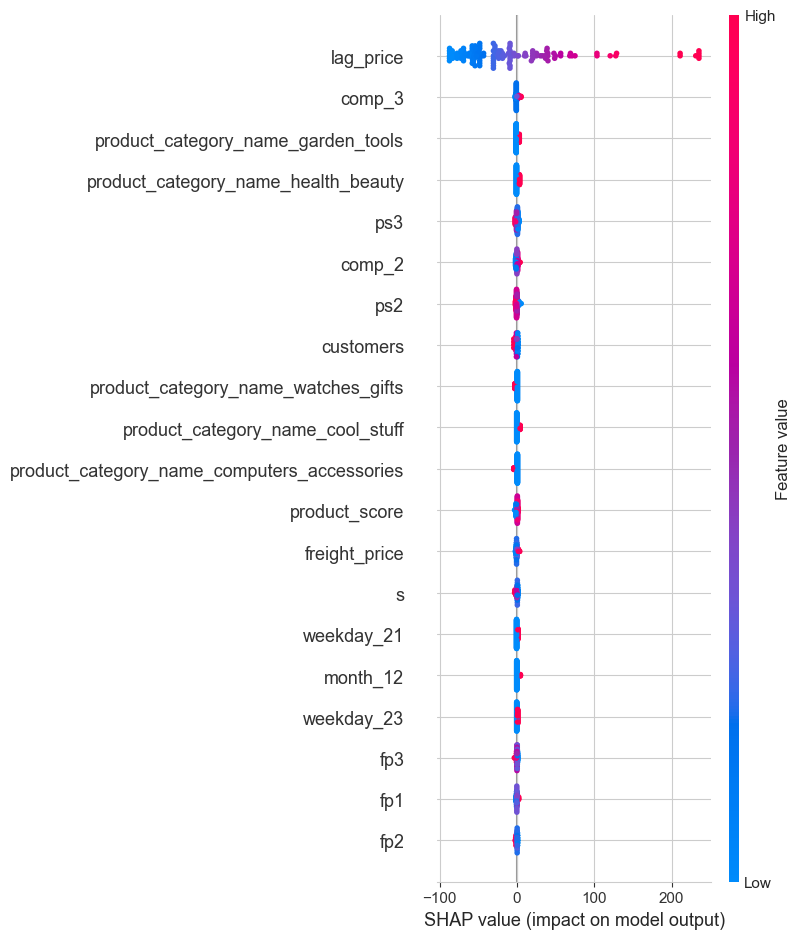

In [83]:
shap.summary_plot(shap_values.squeeze(), xtest.to(torch.float32), feature_names = x_train.columns)

In [75]:
xtest.squeeze().shape

torch.Size([136, 42])

In [74]:
data_w_dummies['comp1_diff'], data_w_dummies['comp2_diff'], data_w_dummies['comp3_diff'] = (data_w_dummies['unit_price'] - data_w_dummies['comp_1']), (data_w_dummies['unit_price'] - data_w_dummies['comp_2']), (data_w_dummies['unit_price'] - data_w_dummies['comp_3'])
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,350,4.0,57,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,350,4.0,61,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,350,4.0,123,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,350,4.0,90,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,350,4.0,54,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,9750,4.4,57,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,9750,4.4,61,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,9750,4.4,123,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,9750,4.4,90,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [75]:
new_corr_mat = df[['unit_price', 'comp_1', 'ps1', 'comp_2', 'ps2', 'comp_3', 'ps3']].corr()
new_corr_mat.style.background_gradient(cmap='coolwarm')

,unit_price,comp_1,ps1,comp_2,ps2,comp_3,ps3
unit_price,1.000000,0.317113,0.197425,0.466459,0.085436,0.383780,-0.242111
comp_1,0.317113,1.000000,-0.187297,0.532859,0.040917,0.650433,-0.272816
ps1,0.197425,-0.187297,1.000000,0.162475,0.283570,0.136506,-0.099874
comp_2,0.466459,0.532859,0.162475,1.000000,0.276794,0.472245,-0.336730
ps2,0.085436,0.040917,0.283570,0.276794,1.000000,0.027418,-0.019399
comp_3,0.383780,0.650433,0.136506,0.472245,0.027418,1.000000,-0.240014
ps3,-0.242111,-0.272816,-0.099874,-0.336730,-0.019399,-0.240014,1.000000


In [76]:
new_x = data_w_dummies.drop(['unit_price', 'comp_1', 'comp_2', 'comp_3'], axis=1)

In [77]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_x, y, test_size=0.2, random_state=42)
scaler2 = StandardScaler()
x_scaled2 = scaler2.fit_transform(x_train2)
x_test_scaled2 = scaler2.transform(x_test2)

x_scaled2 = torch.from_numpy(x_scaled2).to(torch.float32)
x_test_scaled2 = torch.from_numpy(x_test_scaled2).to(torch.float32)
ytrain2 = torch.tensor(list(y_train2))
ytest2 = torch.tensor(list(y_test2))

In [78]:
new_x.shape

(676, 44)

In [79]:
class NewLinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(NewLinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(44, 1) 

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [80]:
enhanced_model = NewLinearRegressionModel()
criterion2 = torch.nn.MSELoss(reduction='mean')
optimizer2 = torch.optim.SGD(enhanced_model.parameters(), lr = 0.03)

In [81]:
epochs2 = []
losses2 = []
for epoch in range(500):

    # Forward pass: Compute predicted y by passing 
    # x to the model
    pred_y = enhanced_model(x_scaled2)

    # Compute and print loss
    loss2 = criterion2(pred_y.squeeze(), ytrain2.float())

    # Zero gradients, perform a backward pass, 
    # and update the weights.
    optimizer2.zero_grad()
    loss2.backward()
    optimizer2.step()
    print('epoch {}, loss {}'.format(epoch, loss2.item()))
    losses2.append(loss2.item())
    epochs2.append(epoch)

epoch 0, loss 17634.4375
epoch 1, loss 14093.2783203125
epoch 2, loss 11607.216796875
epoch 3, loss 9775.341796875
epoch 4, loss 8364.69140625
epoch 5, loss 7237.55810546875
epoch 6, loss 6310.6083984375
epoch 7, loss 5531.8369140625
epoch 8, loss 4867.529296875
epoch 9, loss 4294.83740234375
epoch 10, loss 3797.538330078125
epoch 11, loss 3363.565673828125
epoch 12, loss 2983.57373046875
epoch 13, loss 2650.06787109375
epoch 14, loss 2356.879638671875
epoch 15, loss 2098.83154296875
epoch 16, loss 1871.5101318359375
epoch 17, loss 1671.122802734375
epoch 18, loss 1494.382568359375
epoch 19, loss 1338.42822265625
epoch 20, loss 1200.7606201171875
epoch 21, loss 1079.192626953125
epoch 22, loss 971.8052978515625
epoch 23, loss 876.9138793945312
epoch 24, loss 793.0377197265625
epoch 25, loss 718.8738403320312
epoch 26, loss 653.2765502929688
epoch 27, loss 595.236328125
epoch 28, loss 543.8643798828125
epoch 29, loss 498.376953125
epoch 30, loss 458.0840148925781
epoch 31, loss 422.3769

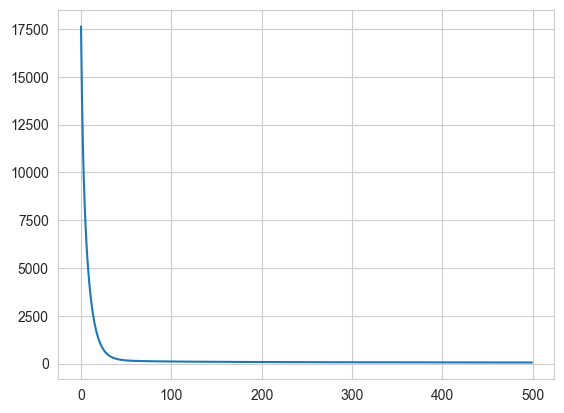

In [82]:
plt.plot(epochs2, losses2)

In [103]:
D, p_value = stats.kstest(df['unit_price'], 'lognorm', args=(shape, loc, scale))
print(f"KS statistic: {D:.4f}, p-value: {p_value:.4f}")

KS statistic: 0.0634, p-value: 0.0083


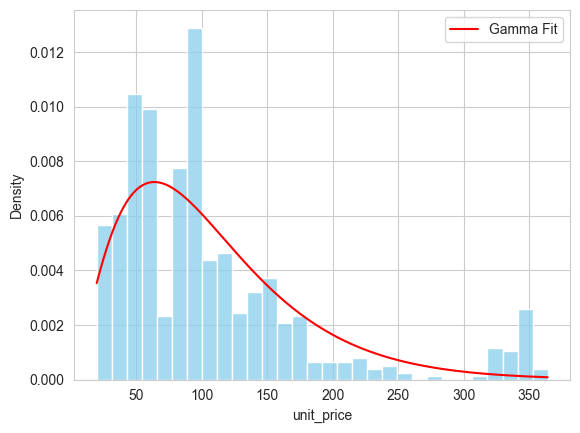

In [105]:
from scipy.stats import gamma

shape, loc, scale = gamma.fit(df['unit_price'], floc=0)
sns.histplot(df['unit_price'], kde=False, stat="density", bins=30, color='skyblue')
x = np.linspace(min(df['unit_price']), max(df['unit_price']), 1000)
plt.plot(x, gamma.pdf(x, shape, loc=loc, scale=scale), 'r-', label='Gamma Fit')
plt.legend()

In [107]:
from scipy.stats import kstest
D, p = kstest(df['unit_price'], 'gamma', args=(shape, loc, scale))
print(f"Gamma: KS={D:.4f}, p={p:.4f}")

Gamma: KS=0.0859, p=0.0001


In [108]:
from scipy.stats import invgauss
params = invgauss.fit(df['unit_price'])

In [109]:
params

(np.float64(0.5106188649688822),
 np.float64(-0.7344115396172236),
 np.float64(209.96224200020112))

In [111]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(x_scaled, y_train)

,max_iter,300
,tol,0.001
,alpha_1,1e-06
,alpha_2,1e-06
,lambda_1,1e-06
,lambda_2,1e-06
,alpha_init,None
,lambda_init,None
,compute_score,False
,fit_intercept,True
,copy_X,True


In [113]:
preds2 = clf.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test, preds2))

np.float64(7.953077404554867)

In [89]:
import xgboost as xg

x_regressor = xg.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    seed = 123
)

x_regressor.fit(x_scaled, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [90]:
xb_pred = x_regressor.predict(x_test_scaled)

In [91]:
mean_squared_error(y_test, xb_pred)

87.03353762245294

In [92]:
np.sqrt(mean_squared_error(y_test, xb_pred))

np.float64(9.329176685134275)

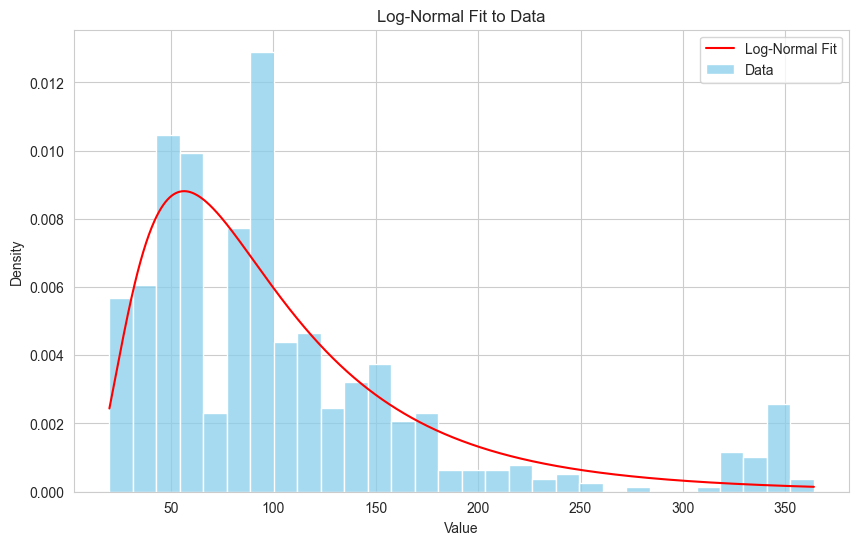

In [102]:
import scipy.stats as stats

shape, loc, scale = stats.lognorm.fit(df['unit_price'], floc=0) 
# fixing location to 0 is common

x = np.linspace(min(df['unit_price']), max(df['unit_price']), 1000)
pdf_fitted = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)

plt.figure(figsize=(10,6))
sns.histplot(df['unit_price'], bins=30, kde=False, stat="density", label="Data", color='skyblue')
plt.plot(x, pdf_fitted, 'r-', label="Log-Normal Fit")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Log-Normal Fit to Data")
plt.grid(True)
plt.show()

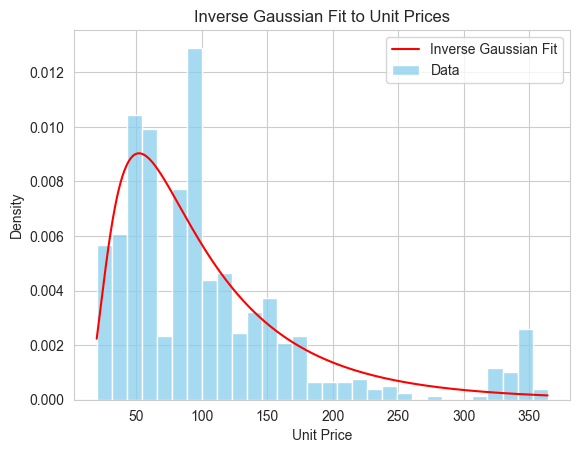

In [110]:
mu, loc, scale = invgauss.fit(df['unit_price'])

# Plotting
x = np.linspace(min(df['unit_price']), max(df['unit_price']), 1000)
pdf_fitted = invgauss.pdf(x, mu, loc=loc, scale=scale)

sns.histplot(df['unit_price'], stat='density', bins=30, color='skyblue', label='Data')
plt.plot(x, pdf_fitted, 'r-', label='Inverse Gaussian Fit')
plt.legend()
plt.title("Inverse Gaussian Fit to Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Density")
plt.grid(True)
plt.show()